# 데이터 전처리

In [2]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path = 'feature_data.xlsx'
feature_data = pd.read_excel(file_path)

# 데이터 확인
feature_data.info()
feature_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   읍면동      28 non-null     object 
 1   의료기관     28 non-null     int64  
 2   가로등      28 non-null     int64  
 3   체육시설     28 non-null     int64  
 4   버스정류소    28 non-null     int64  
 5   노인교실     28 non-null     int64  
 6   공원       28 non-null     int64  
 7   종합사회복지관  28 non-null     int64  
 8   보안등      28 non-null     int64  
 9   고령화지수    28 non-null     float64
 10  개방공공시설   28 non-null     int64  
 11  CCTV     28 non-null     int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 2.8+ KB


,의료기관,가로등,체육시설,버스정류소,노인교실,공원,종합사회복지관,보안등,고령화지수,개방공공시설,CCTV
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,59.964286,1605.571429,16.642857,110.857143,0.428571,22.928571,0.285714,1106.428571,284.722473,3.071429,509.571429
std,63.810763,1067.397230,15.161389,85.210291,0.503953,15.665316,0.658682,808.924546,321.776330,2.508188,353.105212
min,8.000000,256.000000,0.000000,13.000000,0.000000,2.000000,0.000000,140.000000,18.676758,1.000000,117.000000
25%,18.250000,886.250000,5.750000,47.500000,0.000000,10.500000,0.000000,512.000000,44.238874,1.000000,262.750000
50%,37.500000,1357.000000,14.000000,75.500000,0.000000,20.500000,0.000000,842.000000,95.031612,2.500000,400.500000
75%,76.250000,1872.500000,23.750000,166.250000,1.000000,35.500000,0.000000,1665.250000,590.613736,4.000000,593.000000
max,237.000000,4934.000000,75.000000,321.000000,1.000000,61.000000,3.000000,3046.000000,1003.174603,13.000000,1783.000000


### 데이터 스케일링

In [8]:
# 수치형 변수만 선택하여 스케일링 (읍면동 제외)
scaler = StandardScaler()
numeric_features = feature_data.drop(columns=['읍면동'])
scaled_features = scaler.fit_transform(numeric_features)
scaled_data = pd.DataFrame(scaled_features, columns=numeric_features.columns)


### 다중공선성 확인

In [ ]:
# 다중공선성 문제를 확인하여 변수 간 중복 정보를 줄이기 위해 수행.
# 다중공선성은 분석 모델에서 특정 변수들이 서로 높은 상관관계를 가질 때 발생하는 문제이다. 이는 불필요한 중복 정보를 모델에 포함시켜 해석을 어렵게 하고, 모델의 성능을 떨어뜨릴 수 있음.
# 따라서, 이를 확인하기 위해 분산 팽창 지수(VIF)를 계산함. -> CCTV, 개방공공시설, 의료기관 등은 서로 상관성이 높아 중복된 정보 제공 가능성 높음.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = scaled_data.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]

print(vif_data)
print('위 VIF결과를 해석해보면, 다중공선성 높은 변수들이 몇 개 있는 것을 알 수 있다. 일반적으로 VIF 값이 10을 초과하면 다중공선성이 높다고 판단하고, 5이하의 값을 권장한다.')
print('예외적으로 CCTV와 개방공공시설의 VIF가 높지만, 그럼에도 불구하고 수용 가능한 수준 내에 있음')

   Variable        VIF
0      의료기관   8.704841
1       가로등   3.950212
2      체육시설   4.930503
3     버스정류소   3.930754
4      노인교실   2.163589
5        공원   8.651069
6   종합사회복지관   2.103417
7       보안등   5.045983
8     고령화지수   4.157744
9    개방공공시설   9.239599
10     CCTV  11.898320
위 VIF결과를 해석해보면, 다중공선성 높은 변수들이 몇 개 있는 것을 알 수 있다. 일반적으로 VIF 값이 10을 초과하면 다중공선성이 높다고 판단하고, 5이하의 값을 권장한다.
예외적으로 CCTV와 개방공공시설의 VIF가 높지만, 그럼에도 불구하고 수용 가능한 수준 내에 있음


### 데이터 스케일링 & 주성분 분석(PCA)

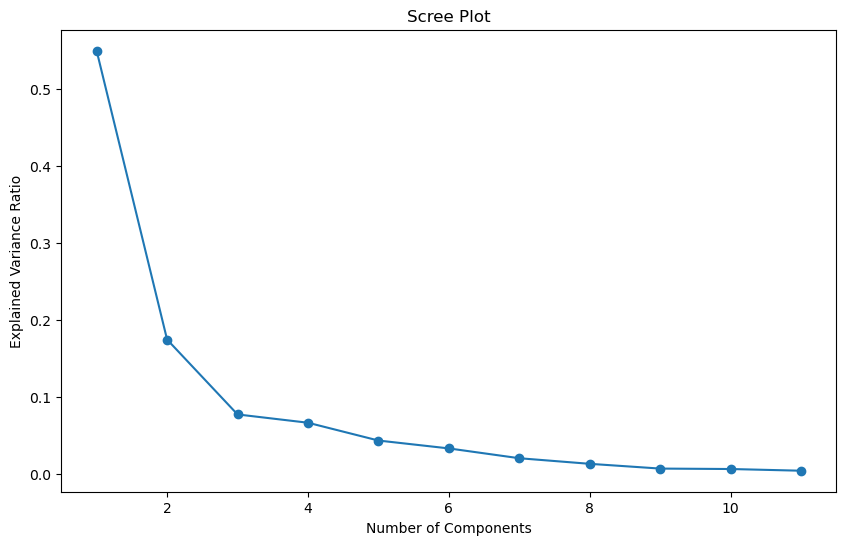

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 수치형 데이터만 포함된 데이터프레임이 numeric_features라는 변수에 담겨 있다고 가정
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)  # X 대신 numeric_features 사용

# 주성분 분석 (PCA)
pca = PCA()
pca_features = pca.fit_transform(scaled_data)

# Scree Plot으로 설명된 분산 비율 확인
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()
print("Scree Plot을 보면 첫 번째에서 두 번째 주성분까지 급격히 감소하고, 그 이후부터는 설명된 분산 비율의 감소폭이 완만해진다. 이러한 Elbow point 이후에 추가되는 주성분들은 설명력의 증가가 작다. 그러므로 이 그래프에서는 세 번째 주성분 이후부터 설명된 분산 비율의 감소가 완만해지는 것을 볼 수 있으므로 n_components=2으로 설정함.") 

### 실루엣 계수 확인

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming `pca_features` is your PCA-transformed data
k_values = range(2, 11)  # Test for k=2 to k=10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(pca_features)
    silhouette_avg = silhouette_score(pca_features, labels)
    silhouette_scores.append(silhouette_avg)

# Create a DataFrame to display k values and their corresponding silhouette scores
silhouette_df = pd.DataFrame({'k': list(k_values), 'Silhouette Score': silhouette_scores})

# Display the DataFrame
print(silhouette_df)
print(' k=2가 가장 적합')

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

    k  Silhouette Score
0   2          0.462119
1   3          0.239251
2   4          0.192885
3   5          0.194612
4   6          0.211846
5   7          0.164358
6   8          0.205499
7   9          0.177826
8  10          0.163003
 k=2가 가장 적합


C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 두 개의 주요 주성분을 생성

In [11]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:")
print("PC1:", explained_variance_ratio[0])
print("PC2:", explained_variance_ratio[1])

# 두 주성분이 설명하는 총 분산 비율
total_explained_variance = explained_variance_ratio.sum()
print("Total explained variance by the first two components:", total_explained_variance)
print("두개의 주성분 PC1,PC2로 전체 데이터의 약 72%를 설명할 수 있다. PCA에서 주요 정보를 잃지 않으면서 차원을 줄이려면 설명된 분산 비율이 70% 이상이면 괜찮다고 평가된다. 70% 이상의 설명된 분산 비율을 확보하면, 데이터의 주요 구조와 패턴을 거의 잃지 않고 요약할 수 있는 것으로 간주됨.")


Explained Variance Ratio of each component:
PC1: 0.5501360906980299
PC2: 0.1749590657482783
Total explained variance by the first two components: 0.7250951564463082
두개의 주성분 PC1,PC2로 전체 데이터의 약 72%를 설명할 수 있다. PCA에서 주요 정보를 잃지 않으면서 차원을 줄이려면 설명된 분산 비율이 70% 이상이면 괜찮다고 평가된다. 70% 이상의 설명된 분산 비율을 확보하면, 데이터의 주요 구조와 패턴을 거의 잃지 않고 요약할 수 있는 것으로 간주됨.


주성분 계수 (loadings):
              PC1       PC2
의료기관     0.373690  0.019915
가로등      0.334364  0.198345
체육시설     0.324565  0.126380
버스정류소    0.251337  0.462508
노인교실     0.171377  0.388923
공원       0.329741 -0.353334
종합사회복지관  0.202298 -0.302868
보안등      0.305725 -0.272124
고령화지수   -0.162019  0.524742
개방공공시설   0.370536  0.013872
CCTV     0.379480  0.113769


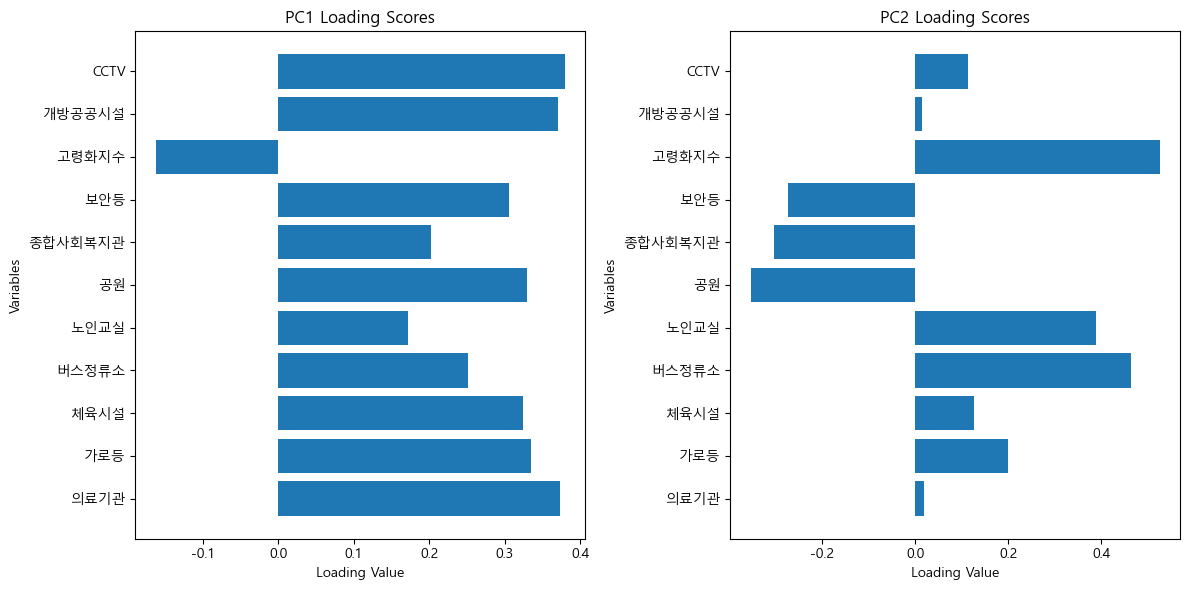

In [53]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Malgun Gothic'은 Windows에서 사용 가능한 폰트입니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 주성분 분석을 위한 데이터 준비
selected_features = feature_data.drop(columns=['읍면동'])  # '읍면동' 열 제외
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# 주성분 계수 (loadings) 구하기
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=selected_features.columns)
print("주성분 계수 (loadings):")
print(loadings)

# 시각화 - 막대그래프로 각 변수의 주성분 기여도 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, pc in enumerate(['PC1', 'PC2']):
    ax[i].barh(loadings.index, loadings[pc])
    ax[i].set_title(f"{pc} Loading Scores")
    ax[i].set_xlabel('Loading Value')
    ax[i].set_ylabel('Variables')

plt.tight_layout()
plt.show()


주성분 계수 (loadings):
              PC1       PC2
의료기관     0.373690  0.019915
가로등      0.334364  0.198345
체육시설     0.324565  0.126380
버스정류소    0.251337  0.462508
노인교실     0.171377  0.388923
공원       0.329741 -0.353334
종합사회복지관  0.202298 -0.302868
보안등      0.305725 -0.272124
고령화지수   -0.162019  0.524742
개방공공시설   0.370536  0.013872
CCTV     0.379480  0.113769


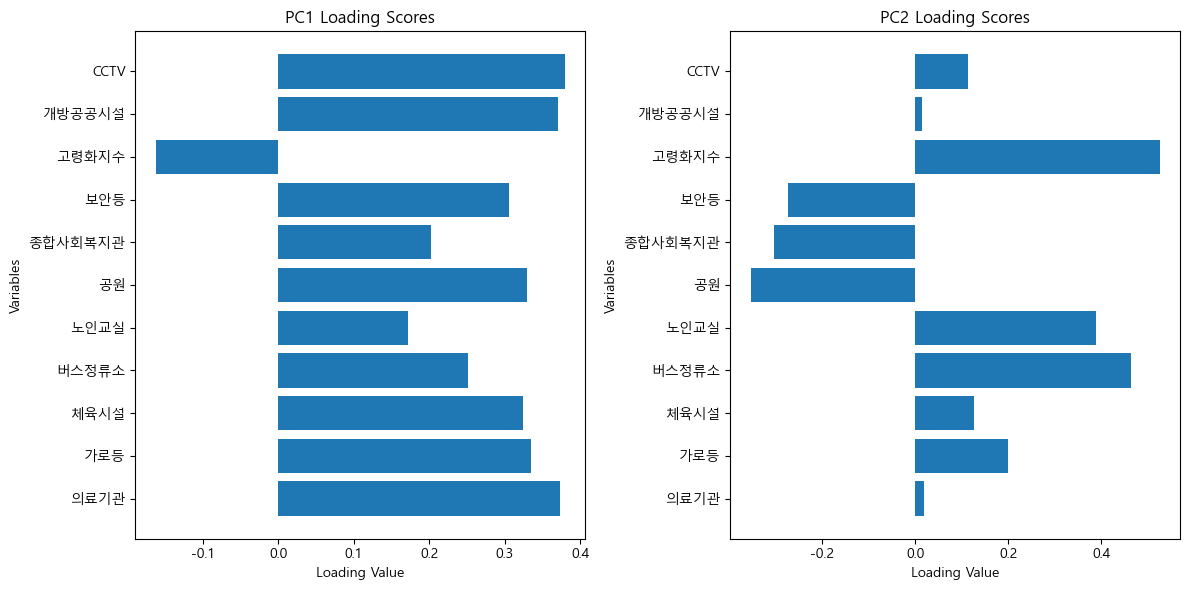

In [60]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Malgun Gothic'은 Windows에서 사용 가능한 폰트입니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 주성분 분석을 위한 데이터 준비
selected_features = feature_data.drop(columns=['읍면동'])  # '읍면동' 열 제외
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
pca.fit(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
# 주성분 계수 (loadings) 구하기
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=selected_features.columns)
print("주성분 계수 (loadings):")
print(loadings)

# 시각화 - 막대그래프로 각 변수의 주성분 기여도 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, pc in enumerate(['PC1', 'PC2']):
    ax[i].barh(loadings.index, loadings[pc])
    ax[i].set_title(f"{pc} Loading Scores")
    ax[i].set_xlabel('Loading Value')
    ax[i].set_ylabel('Variables')

plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

# Loadings 결과를 데이터프레임으로 정리
loadings = {
    'Variable': ['의료기관', '가로등', '체육시설', '버스정류소', '노인교실', '공원', '개방공공시설', '종합사회복지관', '보안등', 'CCTV', '고령화지수'],
    'PC1': [0.373690, 0.334364, 0.324565, 0.251337, 0.171377, 0.329741, 0.370536, 0.202298, 0.305725, 0.379480, -0.162019],
    'PC2': [0.019915, 0.198345, 0.126380, 0.462508, 0.388923, -0.353334, 0.013872, -0.302868, -0.272124, 0.113769, 0.524742]
}

loadings_df = pd.DataFrame(loadings)

# 깔끔하게 표시
display(loadings_df)


,Variable,PC1,PC2
0,의료기관,0.373690,0.019915
1,가로등,0.334364,0.198345
2,체육시설,0.324565,0.126380
3,버스정류소,0.251337,0.462508
4,노인교실,0.171377,0.388923
5,공원,0.329741,-0.353334
6,개방공공시설,0.370536,0.013872
7,종합사회복지관,0.202298,-0.302868
8,보안등,0.305725,-0.272124
9,CCTV,0.379480,0.113769


In [86]:
print("PC1의 양의 로딩 값이 높은 변수들은 안전 및 생활 편의성과 관련된 변수들로 보입니다. 예를 들어, 의료기관, CCTV, 보안등, 가로등 등은 공공 안전과 관련된 요소이며, 체육시설과 공원은 지역 내 생활 편의성을 높이는 요소이다.따라서, PC1은 안전성 및 생활 편의성을 대표하는 주성분으로 해석 가능하다.")
print("PC2에서는 버스정류소, 노인교실, 고령화지수가 양의 값이 높은 반면, 공원과 종합사회복지관은 음의 로딩 값을 가진다. PC2 값이 높을수록 고령층을 위한 복지 서비스와 대중교통 접근성이 좋은 지역일 가능성이 있음.")
print("요약: PC1 -> 주로 안전성 및 생활 편의성을 나타냄,PC1 값이 높을수록 생활 편의시설과 안전 시설이 잘 갖춰진 지역")
print("      PC2 ->복지 서비스 및 교통 접근성, 특히 고령 인구에 대한 복지 서비스에 초점을 맞추며, PC2 값이 높을수록 교통 접근성 및 고령층 복지 서비스가 잘 제공되는 지역으로 해석") 

PC1의 양의 로딩 값이 높은 변수들은 안전 및 생활 편의성과 관련된 변수들로 보입니다. 예를 들어, 의료기관, CCTV, 보안등, 가로등 등은 공공 안전과 관련된 요소이며, 체육시설과 공원은 지역 내 생활 편의성을 높이는 요소이다.따라서, PC1은 안전성 및 생활 편의성을 대표하는 주성분으로 해석 가능하다.
PC2에서는 버스정류소, 노인교실, 고령화지수가 양의 값이 높은 반면, 공원과 종합사회복지관은 음의 로딩 값을 가진다. PC2 값이 높을수록 고령층을 위한 복지 서비스와 대중교통 접근성이 좋은 지역일 가능성이 있음.
요약: PC1 -> 주로 안전성 및 생활 편의성을 나타냄,PC1 값이 높을수록 생활 편의시설과 안전 시설이 잘 갖춰진 지역
      PC2 ->복지 서비스 및 교통 접근성, 특히 고령 인구에 대한 복지 서비스에 초점을 맞추며, PC2 값이 높을수록 교통 접근성 및 고령층 복지 서비스가 잘 제공되는 지역으로 해석


# 1) K-Means Clustering

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: 'Malgun Gothic'은 Windows에서 사용 가능)
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


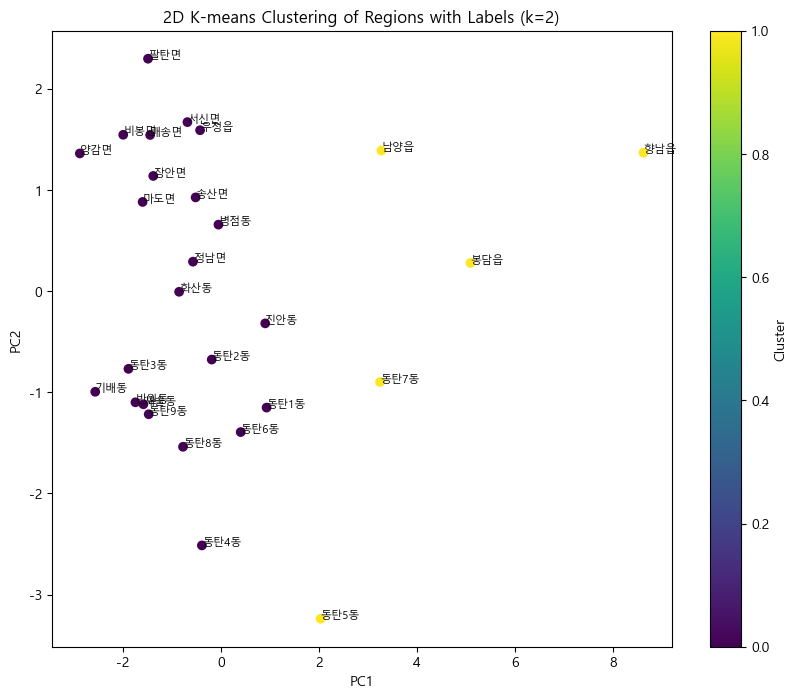

특정 클러스터에 여러 데이터 포인트가 밀집되어 있는 반면, 다른 클러스터는 더 넓게 퍼져 있다. 이렇게 분포가 불균형하게 나타나면, 클러스터링 결과가 각 클러스터의 특징을 잘 설명 못하므로 기각.


In [80]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.cluster import KMeans
import pandas as pd

# 한글 폰트 설정 (예: 'Malgun Gothic'은 Windows에서 사용 가능)
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
file_path = 'feature_data.xlsx'
feature_data = pd.read_excel(file_path)

# 주성분 분석(PCA)을 통해 나온 pca_df 데이터프레임 사용
# 클러스터링 수행 (k=2 설정)
kmeans = KMeans(n_clusters=2, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# 지역명 리스트
regions = feature_data['읍면동']  # 지역명을 담고 있는 열을 선택합니다.

# 2D 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# 축 라벨 설정
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D K-means Clustering of Regions with Labels (k=2)')

# 각 데이터 포인트 위에 지역명 표시
for i, region in enumerate(regions):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], region, fontsize=8)

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()
print("특정 클러스터에 여러 데이터 포인트가 밀집되어 있는 반면, 다른 클러스터는 더 넓게 퍼져 있다. 이렇게 분포가 불균형하게 나타나면, 클러스터링 결과가 각 클러스터의 특징을 잘 설명 못하므로 기각.")

In [78]:
print("K-means Clustering을 사용하여 데이터를 두 개의 군집으로 나눔. 각 데이터 포인트는 하나의 지역을 나타내며, 각 지역은 군집에 따라 색상으로 구분됨. 보라색은 Cluster 0, 노란색은 Cluster 1에 해당")
print("PC1: 높은 값일수록 안전성과 생활 편의성이 높은 지역, PC2: 높은 값일수록 복지 서비스가 많은 반면, 교통 접근성이 낮은 지역임.")
print("Cluster 0 (보라색): 주로 PC1 값이 중간에서 낮은 위치에 있으며, 복지 서비스는 다소 부족하지만, 교통 접근성이 높은 지역들로 구성되어 있음. 이 군집의 지역들은 생활 편의성이 보통 수준이거나 낮고, 복지 서비스와 안전성 측면에서의 특성이 강하게 드러나지 않음.")
print("Cluster 1 (노란색): 주로 PC1 값이 높으며, 안전성과 생활 편의성이 매우 높은 지역들로 구성되어 있음. 이 군집에 속한 지역들은 상대적으로 높은 생활 편의성을 제공하지만, 복지 서비스나 교통 접근성에서는 큰 특성을 보이지 않음.")


K-means Clustering을 사용하여 데이터를 두 개의 군집으로 나눔. 각 데이터 포인트는 하나의 지역을 나타내며, 각 지역은 군집에 따라 색상으로 구분됨. 보라색은 Cluster 0, 노란색은 Cluster 1에 해당
PC1: 높은 값일수록 안전성과 생활 편의성이 높은 지역, PC2: 높은 값일수록 복지 서비스가 많은 반면, 교통 접근성이 낮은 지역임.
Cluster 0 (보라색): 주로 PC1 값이 중간에서 낮은 위치에 있으며, 복지 서비스는 다소 부족하지만, 교통 접근성이 높은 지역들로 구성되어 있음. 이 군집의 지역들은 생활 편의성이 보통 수준이거나 낮고, 복지 서비스와 안전성 측면에서의 특성이 강하게 드러나지 않음.
Cluster 1 (노란색): 주로 PC1 값이 높으며, 안전성과 생활 편의성이 매우 높은 지역들로 구성되어 있음. 이 군집에 속한 지역들은 상대적으로 높은 생활 편의성을 제공하지만, 복지 서비스나 교통 접근성에서는 큰 특성을 보이지 않음.


In [38]:
# 클러스터별로 지역을 분류하여 보기 좋게 데이터프레임으로 정리
clustered_regions = pca_df[['PC1', 'PC2', 'Cluster']].copy()
clustered_regions['Region'] = feature_data['읍면동']  # 기존 지역명을 가져와 추가

# 클러스터별로 지역 목록을 문자열로 정리
clustered_regions_df = clustered_regions.groupby('Cluster')['Region'].apply(lambda x: ', '.join(x)).reset_index()
clustered_regions_df.rename(columns={'Region': 'Regions in Cluster'}, inplace=True)

# 결과 출력
display(clustered_regions_df)

# 클래스 불균형을 확인하여 메시지 출력
cluster_counts = clustered_regions_df['Regions in Cluster'].apply(lambda x: len(x.split(', ')))
if any(count < 5 for count in cluster_counts):
    print("클러스터 내 지역 수가 불균형하여, K-means 클러스터링 결과 기각 판단이 적합합니다.")
else:
    print("K-means 클러스터링 결과는 균형을 이룬 것으로 판단됩니다.")

,Cluster,Regions in Cluster
0,0,"우정읍, 매송면, 비봉면, 마도면, 송산면, 서신면, 팔탄면, 장안면, 양감면, 정..."
1,1,"봉담읍, 향남읍, 남양읍, 동탄5동, 동탄7동"


K-means 클러스터링 결과는 균형을 이룬 것으로 판단됩니다.


# 2) Hierarchical Clustering(계층적 군집분석) 

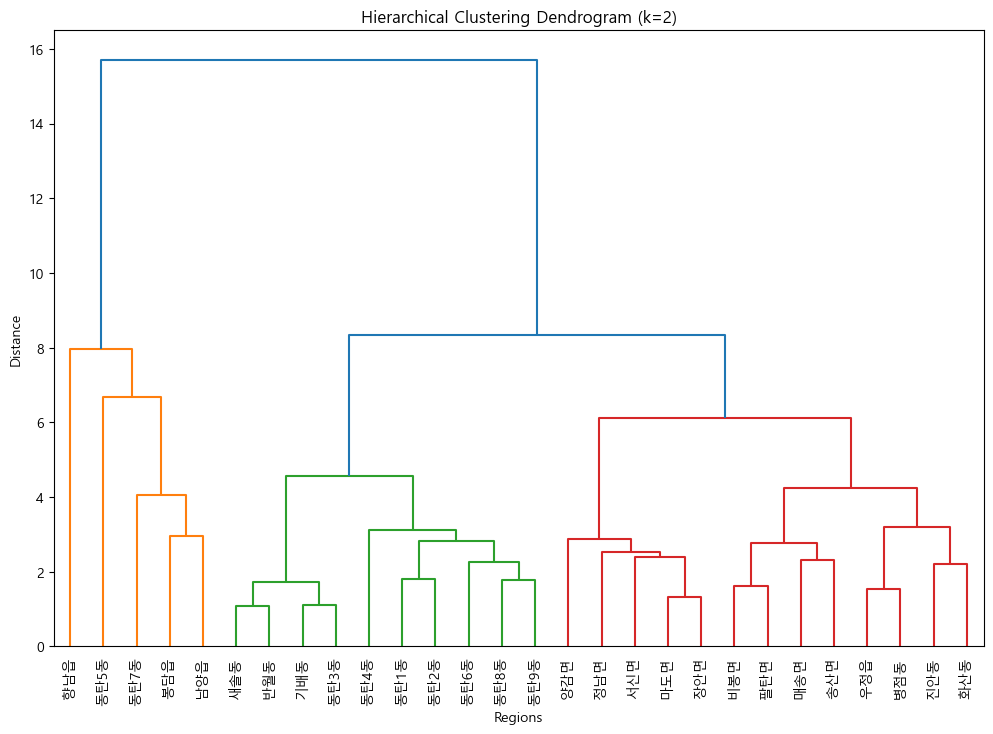

,읍면동,Cluster
0,봉담읍,1
25,동탄7동,1
2,향남읍,1
3,남양읍,1
23,동탄5동,1
24,동탄6동,2
22,동탄4동,2
21,동탄3동,2
20,동탄2동,2
19,동탄1동,2


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path = 'feature_data.xlsx'
feature_data = pd.read_excel(file_path)

# '읍면동' 열 제외한 수치형 데이터만 사용
numeric_features = feature_data.drop(columns=['읍면동'])

# 스케일링 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# 계층적 군집분석 수행 (연결 방법은 'ward' 사용)
linkage_matrix = linkage(scaled_data, method='ward')

# k=2로 잘라서 클러스터링 레이블 생성
cluster_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')
feature_data['Cluster'] = cluster_labels  # 각 지역의 군집 레이블 확인을 위해 추가

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=feature_data['읍면동'].values, leaf_rotation=90, leaf_font_size=10, color_threshold=linkage_matrix[-2, 2])
plt.title("Hierarchical Clustering Dendrogram (k=2)")
plt.xlabel("Regions")
plt.ylabel("Distance")
plt.show()

# 결과 데이터프레임 출력
clustered_regions_df = feature_data[['읍면동', 'Cluster']].sort_values('Cluster')
display(clustered_regions_df)


In [88]:
print("이 계층적 군집분석 결과는 클러스터 간 불균형이 심하고, 클러스터 간 구분이 명확하지 않아 해석력이 떨어집니다. 한쪽 클러스터에 데이터가 과도하게 몰려있고 내부 군집이 지나치게 세분화되어 군집화의 일관성이 부족합니다. 따라서, 이 군집화 결과를 사용하는 것은 분석에 적절하지 않습니다.")

이 계층적 군집분석 결과는 클러스터 간 불균형이 심하고, 클러스터 간 구분이 명확하지 않아 해석력이 떨어집니다. 한쪽 클러스터에 데이터가 과도하게 몰려있고 내부 군집이 지나치게 세분화되어 군집화의 일관성이 부족합니다. 따라서, 이 군집화 결과를 사용하는 것은 분석에 적절하지 않습니다.


# 3) K-medoids Clustering

In [17]:
!pip install scikit-learn-extra


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


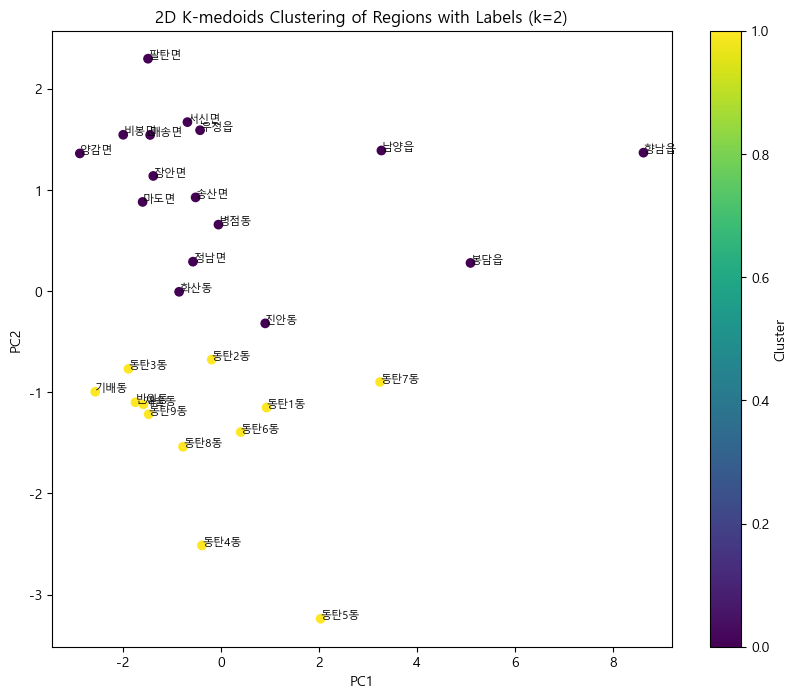

,Cluster,Regions in Cluster
0,0,"[봉담읍, 우정읍, 향남읍, 남양읍, 매송면, 비봉면, 마도면, 송산면, 서신면, ..."
1,1,"[새솔동, 반월동, 기배동, 동탄1동, 동탄2동, 동탄3동, 동탄4동, 동탄5동, ..."


이 K-medoids 군집 분석은 두 개의 주성분(PC1, PC2)만을 사용해, 각 클러스터 내에서 데이터의 중심과의 거리가 최소화되도록 분류하여 군집화의 안정성을 높였다. 결과적으로, 군집 0(보라색)에는 주로 일반적인 생활 편의성 및 안전성이 있는 지역이 포함되었고, 군집 1(노란색)에는 복지 및 교통 접근성이 높은 동탄 지역이 집중되었다. 이러한 결과는 지역별 특성에 따라 두 그룹으로 효과적으로 분류되었음을 보여준다.


In [90]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# K-medoids 클러스터링 적용 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(pca_df[['PC1', 'PC2']])  # PC1과 PC2만 사용하여 클러스터링 수행

# PCA 데이터프레임에 클러스터 레이블 추가
pca_df['K-medoids Cluster'] = kmedoids_labels

# 2D 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 각 군집별로 색상 지정 (예: viridis 컬러맵 사용)
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], 
                c=pca_df['K-medoids Cluster'], cmap='viridis', marker='o')
for i, region in enumerate(feature_data['읍면동']):
    ax.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], region, fontsize=8)

# 축 라벨 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('2D K-medoids Clustering of Regions with Labels (k=2)')
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()

# 각 클러스터에 포함된 지역 목록 데이터프레임 생성
cluster_regions = pca_df[['K-medoids Cluster']].copy()
cluster_regions['Region'] = feature_data['읍면동']
clustered_regions_df = cluster_regions.groupby('K-medoids Cluster')['Region'].apply(list).reset_index()
clustered_regions_df.columns = ['Cluster', 'Regions in Cluster']
display(clustered_regions_df)
print("이 K-medoids 군집 분석은 두 개의 주성분(PC1, PC2)만을 사용해, 각 클러스터 내에서 데이터의 중심과의 거리가 최소화되도록 분류하여 군집화의 안정성을 높였다. 결과적으로, 군집 0(보라색)에는 주로 일반적인 생활 편의성 및 안전성이 있는 지역이 포함되었고, 군집 1(노란색)에는 복지 및 교통 접근성이 높은 동탄 지역이 집중되었다. 이러한 결과는 지역별 특성에 따라 두 그룹으로 효과적으로 분류되었음을 보여준다.")

In [21]:
import requests
import pandas as pd
import folium
from sklearn_extra.cluster import KMedoids
import time

# 읍면동 리스트
eup_myeon_dong_list = [
    '봉담읍', '우정읍', '향남읍', '남양읍', '매송면', '비봉면', '마도면', '송산면', '서신면', 
    '팔탄면', '장안면', '양감면', '정남면', '새솔동', '진안동', '병점동', '반월동', '기배동', 
    '화산동', '동탄1동', '동탄2동', '동탄3동', '동탄4동', '동탄5동', '동탄6동', '동탄7동', 
    '동탄8동', '동탄9동'
]

# Kakao API 키
API_KEY = "f5ce64629007239d3fd59675ce3d9fb8"  # 여기에 발급받은 Kakao API 키를 입력하세요.

# 빈 리스트에 결과 저장
latitude = []
longitude = []

# 각 읍면동의 위도와 경도 가져오기
for place in eup_myeon_dong_list:
    url = f"https://dapi.kakao.com/v2/local/search/address.json?query=경기도 화성시 {place}"
    headers = {"Authorization": f"KakaoAK {API_KEY}"}
    response = requests.get(url, headers=headers)
    result = response.json()
    
    if result['documents']:
        latitude.append(float(result['documents'][0]['y']))
        longitude.append(float(result['documents'][0]['x']))
    else:
        latitude.append(None)
        longitude.append(None)
        
    time.sleep(0.5)  # 요청 제한을 피하기 위해 약간의 대기 시간 추가

# DataFrame 생성
feature_data = pd.DataFrame({
    '읍면동': eup_myeon_dong_list,
    'Latitude': latitude,
    'Longitude': longitude
})

# K-medoids 클러스터링 수행 (예시 데이터 사용)
# 클러스터링을 위한 데이터 (임의의 PC1, PC2 값 생성)
feature_data['PC1'] = [i for i in range(len(eup_myeon_dong_list))]
feature_data['PC2'] = [i * 2 for i in range(len(eup_myeon_dong_list))]

# K-medoids 클러스터링 적용 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(feature_data[['PC1', 'PC2']])

# 군집 레이블 추가
feature_data['Cluster'] = kmedoids_labels

# 지도 생성
map_center = [feature_data['Latitude'].mean(), feature_data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['purple', 'yellow']

# 각 지역에 마커 추가
for idx, row in feature_data.iterrows():
    cluster = row['Cluster']
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['읍면동'],
        icon=folium.Icon(color=colors[cluster])
    ).add_to(map)

# 지도 표시
map.save("kmedoids_clustering_map.html")  # HTML 파일로 저장
map

C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7460\2432414593.py:70: UserWarning: color argument of Icon should be one of: {'blue', 'gray', 'beige', 'lightblue', 'red', 'green', 'white', 'darkblue', 'lightgray', 'cadetblue', 'darkgreen', 'black', 'darkpurple', 'orange', 'lightred', 'pink', 'darkred', 'lightgreen', 'purple'}.
  icon=folium.Icon(color=colors[cluster])


# GMM

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


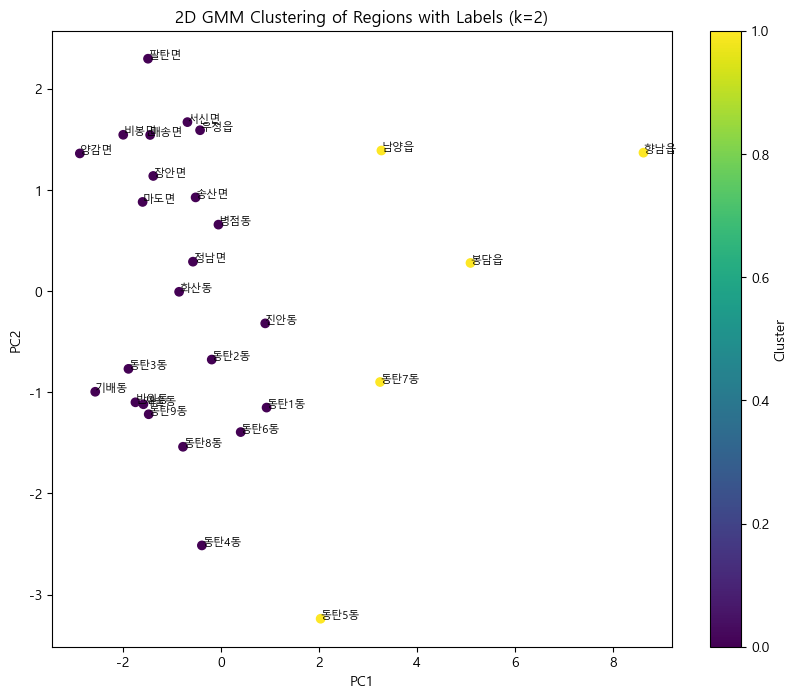

,Cluster,Regions in Cluster
0,0,"[우정읍, 매송면, 비봉면, 마도면, 송산면, 서신면, 팔탄면, 장안면, 양감면, ..."
1,1,"[봉담읍, 향남읍, 남양읍, 동탄5동, 동탄7동]"


이 GMM 결과에서는 두 개의 주요 클러스터로 나뉘었지만, 클러스터 내의 지역들이 명확하게 구분되지 않고 분포가 겹치는 경향이 있어 군집 간의 경계가 불분명하다. 특히, 노란색으로 표시된 클러스터가 일부 지역에만 집중된 반면, 대부분의 지역이 보라색 클러스터에 속해 있어 분류의 불균형이 나타난다. 이러한 이유로, 이 군집 분석 결과는 해석에 어려움이 있어 기각함.


In [93]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# GMM 클러스터링 적용 (PC1과 PC2만 사용)
gmm = GaussianMixture(n_components=2, random_state=0)  # 클러스터 수 2로 설정
gmm_labels = gmm.fit_predict(pca_df[['PC1', 'PC2']])

# PCA 데이터프레임에 GMM 클러스터 레이블 추가
pca_df['GMM Cluster'] = gmm_labels

# 2D 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 각 군집별로 색상 지정 (예: viridis 컬러맵 사용)
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], 
                c=pca_df['GMM Cluster'], cmap='viridis', marker='o')
for i, region in enumerate(feature_data['읍면동']):
    ax.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], region, fontsize=8)

# 축 라벨 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('2D GMM Clustering of Regions with Labels (k=2)')

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()

# 각 클러스터에 포함된 지역 목록 데이터프레임 생성
cluster_regions = pca_df[['GMM Cluster']].copy()
cluster_regions['Region'] = feature_data['읍면동']
clustered_regions_df = cluster_regions.groupby('GMM Cluster')['Region'].apply(list).reset_index()
clustered_regions_df.columns = ['Cluster', 'Regions in Cluster']
display(clustered_regions_df)
print("이 GMM 결과에서는 두 개의 주요 클러스터로 나뉘었지만, 클러스터 내의 지역들이 명확하게 구분되지 않고 분포가 겹치는 경향이 있어 군집 간의 경계가 불분명하다. 특히, 노란색으로 표시된 클러스터가 일부 지역에만 집중된 반면, 대부분의 지역이 보라색 클러스터에 속해 있어 분류의 불균형이 나타난다. 이러한 이유로, 이 군집 분석 결과는 해석에 어려움이 있어 기각함.")

In [61]:
import pandas as pd
import folium
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path = 'feature_data_with_coordinates.xlsx'
feature_data = pd.read_excel(file_path)

# 데이터 스케일링 및 PCA 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_data.select_dtypes(include=['float64', 'int64']))
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# K-medoids 클러스터링 수행
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = kmedoids_labels  # 클러스터 레이블 추가

# 위도, 경도와 결합한 최종 데이터 생성
final_df = pd.concat([feature_data[['읍면동', 'Latitude', 'Longitude']], pca_df['Cluster']], axis=1)

# 지도 생성
map_center = [final_df['Latitude'].mean(), final_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['purple', 'yellow']

# 각 읍면동을 클러스터별로 지도에 표시
for _, row in final_df.iterrows():
    cluster = row['Cluster']
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7,
        popup=row['읍면동']
    ).add_to(m)

# 지도 저장
m.save("kmedoids_clustering_map.html")
m



In [41]:
import requests
import pandas as pd
import folium
from sklearn_extra.cluster import KMedoids
import time

# 읍면동 리스트
eup_myeon_dong_list = [
    '봉담읍', '우정읍', '향남읍', '남양읍', '매송면', '비봉면', '마도면', '송산면', '서신면', 
    '팔탄면', '장안면', '양감면', '정남면', '새솔동', '진안동', '병점동', '반월동', '기배동', 
    '화산동', '동탄1동', '동탄2동', '동탄3동', '동탄4동', '동탄5동', '동탄6동', '동탄7동', 
    '동탄8동', '동탄9동'
]

# Kakao API 키
API_KEY = "f5ce64629007239d3fd59675ce3d9fb8"  # 여기에 발급받은 Kakao API 키를 입력하세요.

# 빈 리스트에 결과 저장
latitude = []
longitude = []

# 각 읍면동의 위도와 경도 가져오기
for place in eup_myeon_dong_list:
    url = f"https://dapi.kakao.com/v2/local/search/address.json?query=경기도 화성시 {place}"
    headers = {"Authorization": f"KakaoAK {API_KEY}"}
    response = requests.get(url, headers=headers)
    result = response.json()
    
    if result['documents']:
        latitude.append(float(result['documents'][0]['y']))
        longitude.append(float(result['documents'][0]['x']))
    else:
        latitude.append(None)
        longitude.append(None)
        
    time.sleep(0.5)  # 요청 제한을 피하기 위해 약간의 대기 시간 추가

# DataFrame 생성
feature_data = pd.DataFrame({
    '읍면동': eup_myeon_dong_list,
    'Latitude': latitude,
    'Longitude': longitude
})

# K-medoids 클러스터링 수행 (예시 데이터 사용)
# 클러스터링을 위한 데이터 (임의의 PC1, PC2 값 생성)
feature_data['PC1'] = [i for i in range(len(eup_myeon_dong_list))]
feature_data['PC2'] = [i * 2 for i in range(len(eup_myeon_dong_list))]

# K-medoids 클러스터링 적용 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(feature_data[['PC1', 'PC2']])

# 군집 레이블 추가
feature_data['Cluster'] = kmedoids_labels

# 지도 생성
map_center = [feature_data['Latitude'].mean(), feature_data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['purple', 'yellow']

# 각 지역에 마커 추가
for idx, row in feature_data.iterrows():
    cluster = row['Cluster']
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['읍면동'],
        icon=folium.Icon(color=colors[cluster])
    ).add_to(map)

# 지도 표시
map.save("kmedoids_clustering_map.html")  # HTML 파일로 저장
map


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7460\597546219.py:70: UserWarning: color argument of Icon should be one of: {'blue', 'gray', 'beige', 'lightblue', 'red', 'green', 'white', 'darkblue', 'lightgray', 'cadetblue', 'darkgreen', 'black', 'darkpurple', 'orange', 'lightred', 'pink', 'darkred', 'lightgreen', 'purple'}.
  icon=folium.Icon(color=colors[cluster])


In [81]:
import pandas as pd
import folium
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 읍면동 리스트 및 위도/경도 값
eup_myeon_dong_list = [
    '봉담읍', '우정읍', '향남읍', '남양읍', '매송면', '비봉면', '마도면', '송산면', '서신면', 
    '팔탄면', '장안면', '양감면', '정남면', '새솔동', '진안동', '병점동', '반월동', '기배동', 
    '화산동', '동탄1동', '동탄2동', '동탄3동', '동탄4동', '동탄5동', '동탄6동', '동탄7동', 
    '동탄8동', '동탄9동'
]

latitude = [
    37.22006773, 37.08982178, 37.13243307, 37.21178748, 37.2523371, 37.23517364, 37.20547372, 
    37.21780535, 37.16657282, 37.16226474, 37.07976448, 37.0813059, 37.15998555, 37.27510661, 
    37.21332265, 37.20691728, 37.2330741, 37.2243917, 37.20603198, 37.20652287, 37.1968525, 
    37.20987476, 37.199665, 37.21024381, 37.19150963, 37.17054839, 37.16229943, 37.18065053
]

longitude = [
    126.9495417, 126.8153124, 126.920344, 126.8237759, 126.9091174, 126.8734009, 126.7696337, 
    126.7391581, 126.7087322, 126.9048526, 126.831329, 126.9444245, 126.9713368, 126.8293426, 
    127.0349608, 127.0372694, 127.0605955, 126.984676, 127.0148337, 127.0719159, 127.0723933, 
    127.0588961, 127.1124147, 127.1040083, 127.0902285, 127.1104574, 127.1052756, 127.1383818
]

# 기존 데이터 불러오기 및 위도, 경도 추가
file_path = 'feature_data.xlsx'
feature_data = pd.read_excel(file_path)
feature_data['Latitude'] = latitude
feature_data['Longitude'] = longitude

# 스케일링 및 PCA 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_data.drop(columns=['읍면동', 'Latitude', 'Longitude']))
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# K-medoids 클러스터링 수행
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = kmedoids_labels

# 원래 데이터와 병합하여 지도 시각화에 필요한 정보 생성
final_df = pd.concat([feature_data[['읍면동', 'Latitude', 'Longitude']], pca_df['Cluster']], axis=1)

# 지도 생성
map_center = [final_df['Latitude'].mean(), final_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['purple', 'yellow']

# 각 읍면동을 클러스터별로 지도에 표시
for _, row in final_df.iterrows():
    cluster = row['Cluster']
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7,
        popup=row['읍면동']
    ).add_to(m)

# 지도 저장
m.save("kmedoids_clustering_map.html")
m


In [82]:
import pandas as pd
import folium
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 지도 시각화 데이터 준비 (위도와 경도 추가된 데이터 사용)
file_path = 'feature_data.xlsx'
feature_data = pd.read_excel(file_path)
latitude = [
    37.22006773, 37.08982178, 37.13243307, 37.21178748, 37.2523371, 37.23517364, 37.20547372, 
    37.21780535, 37.16657282, 37.16226474, 37.07976448, 37.0813059, 37.15998555, 37.27510661, 
    37.21332265, 37.20691728, 37.2330741, 37.2243917, 37.20603198, 37.20652287, 37.1968525, 
    37.20987476, 37.199665, 37.21024381, 37.19150963, 37.17054839, 37.16229943, 37.18065053
]
longitude = [
    126.9495417, 126.8153124, 126.920344, 126.8237759, 126.9091174, 126.8734009, 126.7696337, 
    126.7391581, 126.7087322, 126.9048526, 126.831329, 126.9444245, 126.9713368, 126.8293426, 
    127.0349608, 127.0372694, 127.0605955, 126.984676, 127.0148337, 127.0719159, 127.0723933, 
    127.0588961, 127.1124147, 127.1040083, 127.0902285, 127.1104574, 127.1052756, 127.1383818
]
feature_data['Latitude'] = latitude
feature_data['Longitude'] = longitude

# 데이터 스케일링 및 PCA 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_data.drop(columns=['읍면동', 'Latitude', 'Longitude']))
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# K-medoids 클러스터링 수행
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = kmedoids_labels

# 원래 데이터와 병합하여 지도 시각화에 필요한 정보 생성
final_df = pd.concat([feature_data[['읍면동', 'Latitude', 'Longitude']], pca_df['Cluster']], axis=1)

# 각 클러스터의 메도이드(대표 지점) 식별
medoid_indices = kmedoids.medoid_indices_
medoid_locations = final_df.iloc[medoid_indices]

# 지도 생성
map_center = [final_df['Latitude'].mean(), final_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['purple', 'yellow']

# 각 지역에 마커 추가 (메도이드와 일반 지역 구분)
for idx, row in final_df.iterrows():
    cluster = row['Cluster']
    # 메도이드(군집 중심)일 경우 강조된 스타일 적용
    if idx in medoid_indices:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['읍면동']} (메도이드)",
            icon=folium.Icon(color=colors[cluster], icon='star', prefix='fa')  # 메도이드에는 별 모양으로 표시
        ).add_to(m)
    else:
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=6,
            color=colors[cluster],
            fill=True,
            fill_color=colors[cluster],
            fill_opacity=0.7,
            popup=row['읍면동']
        ).add_to(m)

# 지도 저장
m.save("kmedoids_clustering_map_with_medoid.html")
m


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7460\2621866384.py:60: UserWarning: color argument of Icon should be one of: {'blue', 'gray', 'beige', 'lightblue', 'red', 'green', 'white', 'darkblue', 'lightgray', 'cadetblue', 'darkgreen', 'black', 'darkpurple', 'orange', 'lightred', 'pink', 'darkred', 'lightgreen', 'purple'}.
  icon=folium.Icon(color=colors[cluster], icon='star', prefix='fa')  # 메도이드에는 별 모양으로 표시


In [83]:
import pandas as pd

# 데이터 불러오기
file_path = 'feature_data.xlsx'
data = pd.read_excel(file_path)

# 가중치 설정 (필요에 따라 가중치 조정)
weights = {
    '생활 편의성': 0.2,
    '안전성': 0.1,
    '복지 서비스 접근성': 0.4,
    '교통 접근성': 0.3
}


In [84]:
# 각 기준에 가중치를 곱하여 새로운 열로 추가
for criterion, weight in weights.items():
    data[f'{criterion} 점수'] = data[criterion] * weight


KeyError: '생활 편의성'

In [87]:
import pandas as pd

# 클러스터 결과를 feature_data에 추가했다고 가정
feature_data['Cluster'] = kmedoids_labels  # K-medoids 결과에서 얻은 클러스터 라벨

# 각 클러스터에서 다중 기준 의사결정을 수행
top_locations = []

# 클러스터별로 데이터를 분리하고, 다중 기준 의사결정을 적용하여 최적 위치 선정
for cluster_label in feature_data['Cluster'].unique():
    cluster_data = feature_data[feature_data['Cluster'] == cluster_label].copy()
    
    # 가중치 설정 (기존과 동일)
    weights = {
        '의료기관': 0.2, 
        '가로등': 0.1, 
        '체육시설': 0.15, 
        '버스정류소': 0.2, 
        '노인교실': 0.1, 
        '공원': 0.1, 
        '종합사회복지관': 0.05, 
        '보안등': 0.05, 
        '고령화지수': 0.05, 
        '개방공공시설': 0.05, 
        'CCTV': 0.05
    }
    
    # 각 기준에 가중치를 곱한 점수 계산
    for criterion, weight in weights.items():
        cluster_data[f'{criterion} 점수'] = cluster_data[criterion] * weight
    
    # 총 점수 계산
    cluster_data['총 점수'] = cluster_data[[f'{criterion} 점수' for criterion in weights.keys()]].sum(axis=1)
    
    # 클러스터 내에서 총 점수 기준으로 최적 입지 선정 (상위 1개)
    top_location = cluster_data[['읍면동', '총 점수']].sort_values(by='총 점수', ascending=False).head(1)
    top_location['Cluster'] = cluster_label  # 클러스터 라벨 추가
    top_locations.append(top_location)

# 최적 입지 결과를 데이터프레임으로 결합
top_locations_df = pd.concat(top_locations).reset_index(drop=True)

# 최종 결과 출력
print("클러스터별 최적 입지:")
print(top_locations_df)

클러스터별 최적 입지:
    읍면동        총 점수  Cluster
0   향남읍  819.488667        0
1  동탄7동  443.426314        1


In [88]:
import pandas as pd

# 클러스터 결과를 feature_data에 추가했다고 가정
feature_data['Cluster'] = kmedoids_labels  # K-medoids 결과에서 얻은 클러스터 라벨

# 각 클러스터에서 다중 기준 의사결정을 수행
top_locations = []

# 클러스터별로 데이터를 분리하고, 다중 기준 의사결정을 적용하여 최적 위치 선정
for cluster_label in feature_data['Cluster'].unique():
    cluster_data = feature_data[feature_data['Cluster'] == cluster_label].copy()
    
    # 가중치 설정 (고령화지수에 높은 가중치 부여)
    weights = {
        '의료기관': 0.1, 
        '가로등': 0.05, 
        '체육시설': 0.1, 
        '버스정류소': 0.1, 
        '노인교실': 0.05, 
        '공원': 0.1, 
        '종합사회복지관': 0.05, 
        '보안등': 0.05, 
        '고령화지수': 0.3,  # 고령화지수에 높은 가중치 부여
        '개방공공시설': 0.05, 
        'CCTV': 0.05
    }
    
    # 각 기준에 가중치를 곱한 점수 계산
    for criterion, weight in weights.items():
        cluster_data[f'{criterion} 점수'] = cluster_data[criterion] * weight
    
    # 총 점수 계산
    cluster_data['총 점수'] = cluster_data[[f'{criterion} 점수' for criterion in weights.keys()]].sum(axis=1)
    
    # 클러스터 내에서 총 점수 기준으로 최적 입지 선정 (상위 1개)
    top_location = cluster_data[['읍면동', '총 점수']].sort_values(by='총 점수', ascending=False).head(1)
    top_location['Cluster'] = cluster_label  # 클러스터 라벨 추가
    top_locations.append(top_location)

# 최적 입지 결과를 데이터프레임으로 결합
top_locations_df = pd.concat(top_locations).reset_index(drop=True)

# 최종 결과 출력
print("클러스터별 최적 입지:")
print(top_locations_df)


클러스터별 최적 입지:
    읍면동        총 점수  Cluster
0   서신면  534.771956        0
1  동탄7동  323.357884        1


In [92]:
import pandas as pd

# 클러스터 결과를 feature_data에 추가했다고 가정
feature_data['Cluster'] = kmedoids_labels  # K-medoids 결과에서 얻은 클러스터 라벨

# 클러스터 1에서만 다중 기준 의사결정을 수행
cluster_data = feature_data[feature_data['Cluster'] == 1].copy()

# 가중치 설정 (고령화지수에 높은 가중치 부여)
weights = {
    '의료기관': 0.2, 
    '가로등': 0.05, 
    '체육시설': 0.1, 
    '버스정류소': 0.1, 
    '노인교실': 0.05, 
    '공원': 0.1, 
    '종합사회복지관': 0.05, 
    '보안등': 0.05, 
    '고령화지수': 0.3,  # 고령화지수에 높은 가중치 부여
    '개방공공시설': 0.05, 
    'CCTV': 0.1
}

# 각 기준에 가중치를 곱한 점수 계산
for criterion, weight in weights.items():
    cluster_data[f'{criterion} 점수'] = cluster_data[criterion] * weight

# 총 점수 계산
cluster_data['총 점수'] = cluster_data[[f'{criterion} 점수' for criterion in weights.keys()]].sum(axis=1)

# 클러스터 1 내에서 총 점수 기준으로 상위 5개 입지 선정
top_5_locations = cluster_data[['읍면동', '총 점수']].sort_values(by='총 점수', ascending=False).head(5)

# 최종 결과 출력
print("클러스터 1의 최적 입지 상위 5개 지역:")
print(top_5_locations)


클러스터 1의 최적 입지 상위 5개 지역:
     읍면동        총 점수
25  동탄7동  396.257884
23  동탄5동  320.847952
24  동탄6동  300.256942
19  동탄1동  251.142793
20  동탄2동  200.656587


In [19]:
import pandas as pd

# 클러스터 결과를 feature_data에 추가했다고 가정
feature_data['Cluster'] = kmedoids_labels  # K-medoids 결과에서 얻은 클러스터 라벨

# 가중치 설정 (고령화지수를 50% 이상 반영)
weights = {
    '의료기관': 0.1, 
    '가로등': 0.05, 
    '체육시설': 0.05, 
    '버스정류소': 0.05, 
    '노인교실': 0.05, 
    '공원': 0.05, 
    '종합사회복지관': 0.05, 
    '보안등': 0.05, 
    '고령화지수': 0.55,  # 고령화지수의 가중치를 크게 설정
    '개방공공시설': 0.05, 
    'CCTV': 0.05
}

# 각 기준에 가중치를 곱하여 점수 계산
for criterion, weight in weights.items():
    feature_data[f'{criterion} 점수'] = feature_data[criterion] * weight

# 총 점수 계산
feature_data['총 점수'] = feature_data[[f'{criterion} 점수' for criterion in weights.keys()]].sum(axis=1)

# 클러스터 1에서 상위 5개 최적 입지 선정
top_locations_cluster_1 = feature_data[feature_data['Cluster'] == 1][['읍면동', '총 점수']].sort_values(by='총 점수', ascending=False).head(5)

# 결과 출력
print("클러스터 1의 최적 입지 상위 5개 지역:")
print(top_locations_cluster_1)


클러스터 1의 최적 입지 상위 5개 지역:
     읍면동        총 점수
25  동탄7동  324.439454
23  동탄5동  293.379578
24  동탄6동  278.021060
19  동탄1동  211.686788
27  동탄9동  175.714235


In [ ]:
################################################################################################################################################

# 1차 클러스터링 -> 고령화지수만을 고려해서 100이하인 지역은 버림

In [50]:
import pandas as pd
from sklearn_extra.cluster import KMedoids

# 데이터 불러오기
feature_data = pd.read_excel('feature_data.xlsx')

# 고령화지수를 기준으로 클러스터링할 데이터 선택
age_index = feature_data[['읍면동', '고령화지수']]

# 고령화지수가 100 이상인 지역만 Cluster 1로 설정
age_index['Cluster'] = (age_index['고령화지수'] >= 100).astype(int)

# 클러스터 결과를 feature_data에 추가
feature_data['Cluster'] = age_index['Cluster']

# Cluster 1 (고령화지수가 높은 지역) 데이터 선택
cluster_1_data = feature_data[feature_data['Cluster'] == 1]
print("Cluster 1의 고령화지수가 높은 지역:")
print(cluster_1_data[['읍면동', '고령화지수']])


Cluster 1의 고령화지수가 높은 지역:
    읍면동        고령화지수
1   우정읍   386.118479
3   남양읍   104.170409
4   매송면   618.296530
5   비봉면   642.936288
6   마도면   660.899654
7   송산면   576.871880
8   서신면   985.239852
9   팔탄면   733.150685
10  장안면   625.000000
11  양감면  1003.174603
12  정남면   581.386139
15  병점동   175.410270
17  기배동   105.454545
18  화산동   143.968096


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_13512\3848108491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_index['Cluster'] = (age_index['고령화지수'] >= 100).astype(int)


# 2차 클러스터링

In [73]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path = 'feature_data_2.xlsx'
feature_data = pd.read_excel(file_path)

# 데이터 확인
feature_data.info()
feature_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   읍면동      14 non-null     object 
 1   의료기관     14 non-null     int64  
 2   가로등      14 non-null     int64  
 3   체육시설     14 non-null     int64  
 4   버스정류소    14 non-null     int64  
 5   노인교실     14 non-null     int64  
 6   공원       14 non-null     int64  
 7   종합사회복지관  14 non-null     int64  
 8   보안등      14 non-null     int64  
 9   고령화지수    14 non-null     float64
 10  개방공공시설   14 non-null     int64  
 11  CCTV     14 non-null     int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 1.4+ KB


,의료기관,가로등,체육시설,버스정류소,노인교실,공원,종합사회복지관,보안등,고령화지수,개방공공시설,CCTV
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,35.214286,1489.714286,12.357143,135.500000,0.571429,12.714286,0.071429,702.071429,524.434102,2.214286,423.071429
std,35.377478,894.158859,9.942969,73.762352,0.513553,9.980200,0.267261,487.089545,301.349301,1.251373,190.129698
min,8.000000,277.000000,0.000000,23.000000,0.000000,2.000000,0.000000,149.000000,104.170409,1.000000,158.000000
25%,12.250000,925.500000,5.000000,89.000000,0.000000,5.250000,0.000000,296.750000,228.087323,1.000000,280.750000
50%,19.500000,1357.000000,10.500000,129.000000,1.000000,11.500000,0.000000,654.000000,599.841334,2.000000,400.500000
75%,41.000000,1576.000000,17.500000,187.250000,1.000000,15.500000,0.000000,887.750000,656.408813,3.000000,470.000000
max,132.000000,3734.000000,28.000000,296.000000,1.000000,40.000000,1.000000,1769.000000,1003.174603,5.000000,855.000000


In [74]:
# 수치형 변수만 선택하여 스케일링 (읍면동 제외)
scaler = StandardScaler()
numeric_features = feature_data.drop(columns=['읍면동'])
scaled_features = scaler.fit_transform(numeric_features)
scaled_data = pd.DataFrame(scaled_features, columns=numeric_features.columns)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = scaled_data.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]

print(vif_data)
print('다중공선성이 매우 높으므로 해결방법중 하나인 PCA사용.')

   Variable        VIF
0      의료기관  20.869120
1       가로등   4.149944
2      체육시설   2.936371
3     버스정류소  12.864349
4      노인교실   3.363321
5        공원  11.710905
6   종합사회복지관   2.111961
7       보안등   9.952864
8     고령화지수   7.184877
9    개방공공시설   6.785067
10     CCTV  10.348274
다중공선성이 매우 높으므로 해결방법중 하나인 PCA사용.


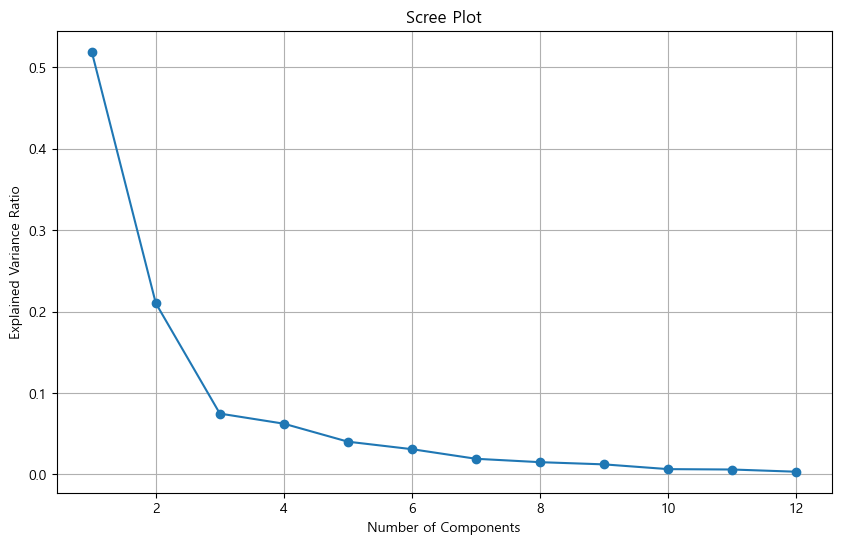

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
feature_data = pd.read_excel('feature_data.xlsx')

# 수치형 데이터 선택
numeric_features = feature_data.drop(columns=['읍면동'])  # 읍면동 열 제외

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# PCA 적용
pca = PCA()
pca.fit(scaled_features)

# Scree Plot으로 설명된 분산 비율 확인
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
feature_data = pd.read_excel('feature_data.xlsx')

# 수치형 데이터 선택
numeric_features = feature_data.drop(columns=['읍면동'])  # 읍면동 열 제외

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# PCA 적용
pca = PCA(n_components=3)  # 3개의 주성분으로 설정
pca.fit(scaled_features)

# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 결과 출력
print("각 주성분이 설명하는 분산 비율:")
print(explained_variance_ratio)

print("\n누적 설명된 분산 비율:")
print(cumulative_variance_ratio)
print('2개의 주성분(PC1, PC2)을 사용하여 클러스터링을 진행할 수 있으며, 이 경우 약 **73%**의 변동성을 설명하기 때문에 데이터의 주요 구조를 충분히 반영할 수 있습니다.')
print('3개의 주성분을 사용할 경우 전체 변동성을 **약 80.41%**까지 설명하지만, 추가적인 주성분의 설명력이 낮기 때문에 클러스터링 성능에 큰 개선이 없을 수 있습니다.')

각 주성분이 설명하는 분산 비율:
[0.51916833 0.21025705 0.0747067 ]

누적 설명된 분산 비율:
[0.51916833 0.72942538 0.80413208]
2개의 주성분(PC1, PC2)을 사용하여 클러스터링을 진행할 수 있으며, 이 경우 약 **73%**의 변동성을 설명하기 때문에 데이터의 주요 구조를 충분히 반영할 수 있습니다.
3개의 주성분을 사용할 경우 전체 변동성을 **약 80.41%**까지 설명하지만, 추가적인 주성분의 설명력이 낮기 때문에 클러스터링 성능에 큰 개선이 없을 수 있습니다.


주성분 계수 (loadings):
              PC1       PC2
의료기관     0.402678  0.140524
가로등      0.299471 -0.331398
체육시설     0.181642 -0.323655
버스정류소    0.323791 -0.125216
노인교실     0.164071  0.538111
공원       0.389854  0.074298
종합사회복지관  0.015858  0.278036
보안등      0.342548 -0.250529
고령화지수   -0.219380 -0.442096
개방공공시설   0.374120  0.250285
CCTV     0.354603 -0.238229


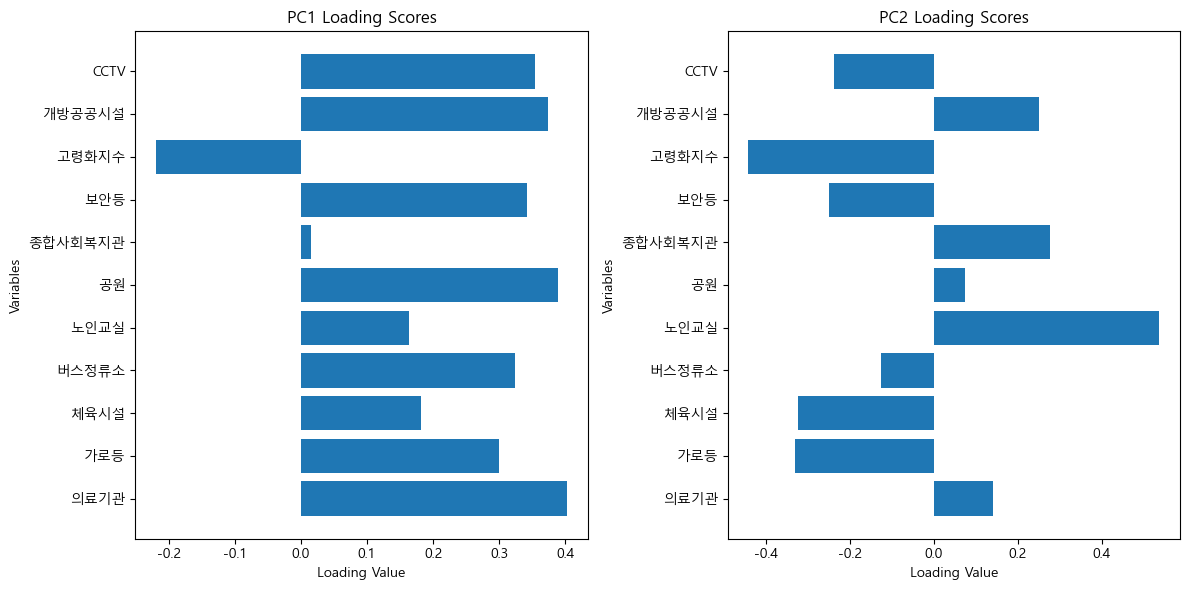

PC2의 해석 -> 고령화지수가 높고 노인교실이 없는 지역: PC2 값이 낮음 (고령화가 심각한 지역으로 판단됨), 고령화지수가 낮고 노인교실이 있는 지역: PC2 값이 높음 (복지 서비스가 잘 갖추어져 있는 지역으로 판단됨)
PC1은 생활 편의성과 안전성을 강조하며, 고령자들의 삶의 질에 중요한 영향을 미칠 수 있는 지역 특성을 나타냅니다.


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Malgun Gothic'은 Windows에서 사용 가능한 폰트입니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 불러오기
feature_data = pd.read_excel('feature_data.xlsx')

# 고령화지수가 높은 지역 데이터 선택
cluster_1_data = feature_data[feature_data['Cluster'] == 1]

# 분석에 사용할 변수 선택 (고령화지수 외의 다른 변수들 포함)
important_features = ['의료기관', '가로등', '체육시설', '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']

# 분석할 데이터 선택
X = cluster_1_data[important_features]

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# 주성분 계수 (loadings) 구하기
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("주성분 계수 (loadings):")
print(loadings)

# 시각화 - 막대그래프로 각 변수의 주성분 기여도 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, pc in enumerate(['PC1', 'PC2']):
    ax[i].barh(loadings.index, loadings[pc])
    ax[i].set_title(f"{pc} Loading Scores")
    ax[i].set_xlabel('Loading Value')
    ax[i].set_ylabel('Variables')

plt.tight_layout()
plt.show()
print("PC2의 해석 -> 고령화지수가 높고 노인교실이 없는 지역: PC2 값이 낮음 (고령화가 심각한 지역으로 판단됨), 고령화지수가 낮고 노인교실이 있는 지역: PC2 값이 높음 (복지 서비스가 잘 갖추어져 있는 지역으로 판단됨)")
print("PC1은 생활 편의성과 안전성을 강조하며, 고령자들의 삶의 질에 중요한 영향을 미칠 수 있는 지역 특성을 나타냅니다.")

# 1) K-Means (기각)

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


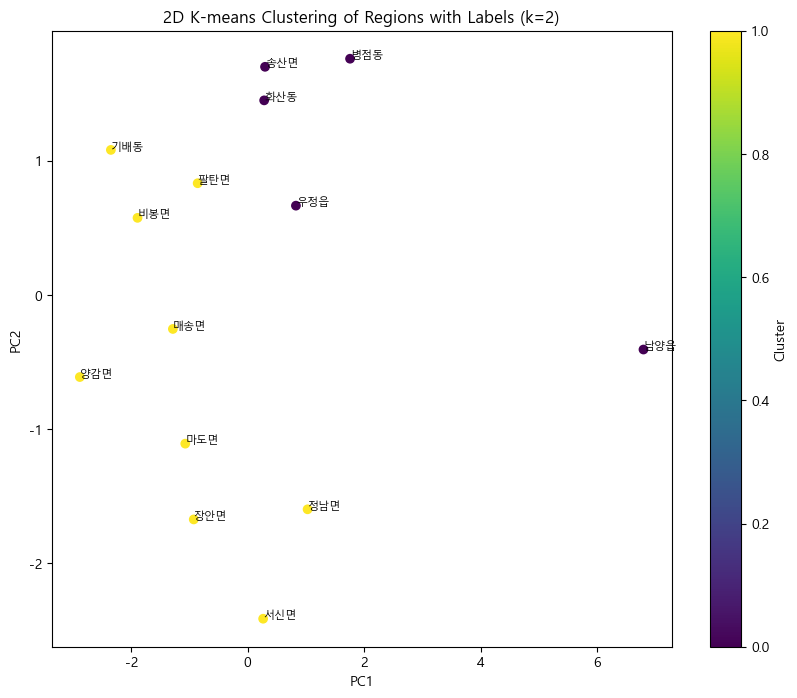

클러스터에 포함된 지역 목록:
    읍면동  Cluster
0   우정읍        0
1   남양읍        0
5   송산면        0
11  병점동        0
13  화산동        0
2   매송면        1
3   비봉면        1
4   마도면        1
6   서신면        1
7   팔탄면        1
8   장안면        1
9   양감면        1
10  정남면        1
12  기배동        1


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.cluster import KMeans

# 한글 폰트 설정 (예: 'Malgun Gothic'은 Windows에서 사용 가능)
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
file_path = 'feature_data_2.xlsx'
feature_data = pd.read_excel(file_path)

# 주성분 분석(PCA) 결과를 포함한 DataFrame (pca_df) 사용
# K-means 클러스터링 수행 (k=2 설정)
kmeans = KMeans(n_clusters=2, random_state=0)
feature_data['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# 2D 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=feature_data['Cluster'], cmap='viridis', marker='o')

# 축 라벨 설정
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D K-means Clustering of Regions with Labels (k=2)')

# 각 데이터 포인트 위에 지역명 표시
for i, region in enumerate(feature_data['읍면동']):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], region, fontsize=8)

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()
clustered_regions_df = feature_data[['읍면동', 'Cluster']].sort_values('Cluster')
print("클러스터에 포함된 지역 목록:")
print(clustered_regions_df)

# 2) Hierarchical Clustering (기각)

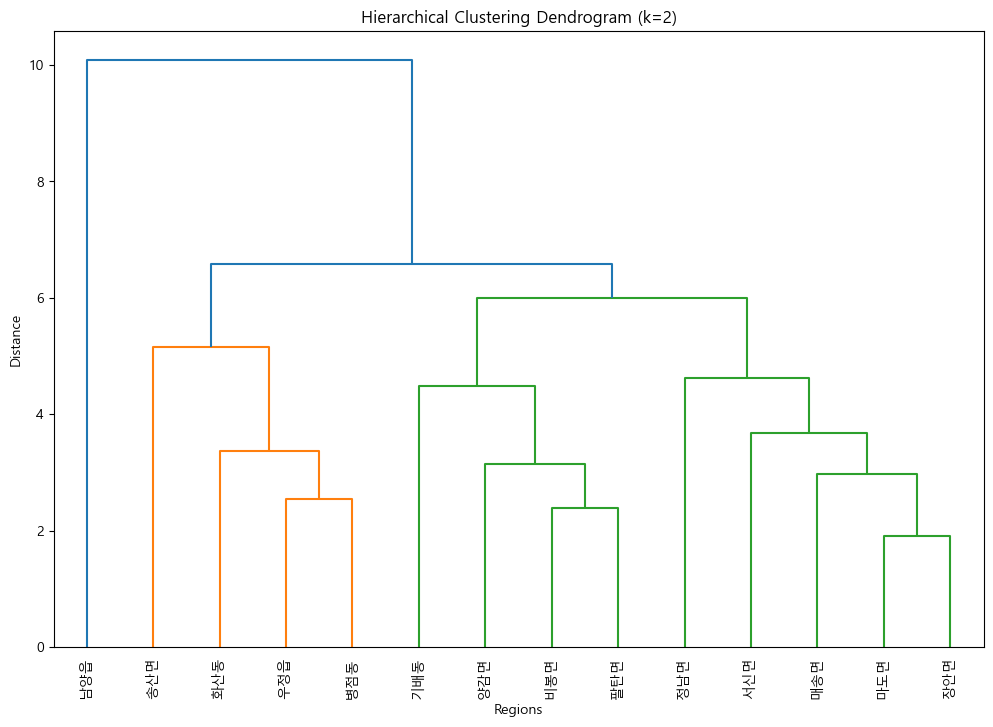

    읍면동  Cluster
0   우정읍        1
2   매송면        1
3   비봉면        1
4   마도면        1
5   송산면        1
6   서신면        1
7   팔탄면        1
8   장안면        1
9   양감면        1
10  정남면        1
11  병점동        1
12  기배동        1
13  화산동        1
1   남양읍        2


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path = 'feature_data_2.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# '읍면동' 열 제외한 수치형 데이터만 사용
numeric_features = feature_data.drop(columns=['읍면동'])

# 스케일링 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# 계층적 군집분석 수행 (연결 방법은 'ward' 사용)
linkage_matrix = linkage(scaled_data, method='ward')

# k=2로 잘라서 클러스터링 레이블 생성
cluster_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')
feature_data['Cluster'] = cluster_labels  # 각 지역의 군집 레이블 확인을 위해 추가

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=feature_data['읍면동'].values, leaf_rotation=90, leaf_font_size=10, color_threshold=linkage_matrix[-2, 2])
plt.title("Hierarchical Clustering Dendrogram (k=2)")
plt.xlabel("Regions")
plt.ylabel("Distance")
plt.show()

# 결과 데이터프레임 출력
clustered_regions_df = feature_data[['읍면동', 'Cluster']].sort_values('Cluster')
print(clustered_regions_df)  # display() 대신 print()로 출력


# 3) K-Medoids (채택)

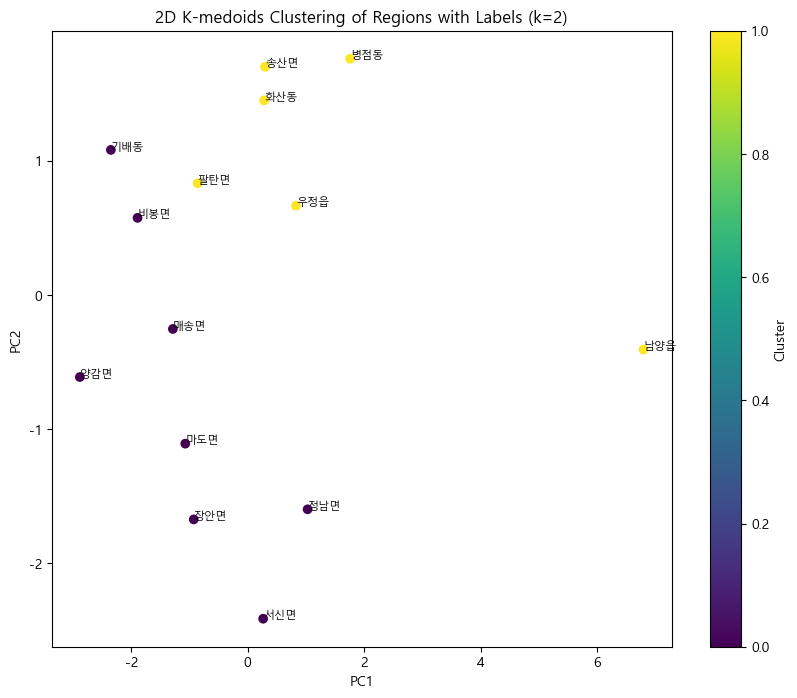

   Cluster                        Regions in Cluster
0        0  [매송면, 비봉면, 마도면, 서신면, 장안면, 양감면, 정남면, 기배동]
1        1            [우정읍, 남양읍, 송산면, 팔탄면, 병점동, 화산동]


In [89]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# 데이터 불러오기
file_path = 'feature_data_2.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# PCA 데이터프레임 (이전에 주성분 분석을 수행한 결과로 가정)
# PCA 결과를 불러온 데이터프레임으로 사용합니다. 아래는 예시입니다.
# pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# K-medoids 클러스터링 적용 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(pca_df[['PC1', 'PC2']])  # PC1과 PC2만 사용하여 클러스터링 수행

# PCA 데이터프레임에 클러스터 레이블 추가
pca_df['K-medoids Cluster'] = kmedoids_labels

# 2D 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 각 군집별로 색상 지정 (viridis 컬러맵 사용)
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], 
                c=pca_df['K-medoids Cluster'], cmap='viridis', marker='o')

# 지역명 추가
for i, region in enumerate(feature_data['읍면동']):
    ax.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], region, fontsize=8)

# 축 라벨 및 제목 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('2D K-medoids Clustering of Regions with Labels (k=2)')
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()

# 각 클러스터에 포함된 지역 목록 데이터프레임 생성
cluster_regions = pca_df[['K-medoids Cluster']].copy()
cluster_regions['Region'] = feature_data['읍면동']
clustered_regions_df = cluster_regions.groupby('K-medoids Cluster')['Region'].apply(list).reset_index()
clustered_regions_df.columns = ['Cluster', 'Regions in Cluster']

# 결과 출력
print(clustered_regions_df)


In [95]:
print("Cluster 0:고령화지수가 상대적으로 높은 경향이 있으며, 개발이 덜 된 지역이 많다. 의료기관, 버스정류소, 공원, 노인교실 등의 서비스가 상대적으로 부족할 수 있으며, 생활 편의성이 낮을 가능성이 있음.이러한 지역들은 인구 밀도가 낮거나 노인 인구가 상대적으로 적을 수 있어 복지센터의 수요가 적을 수 있다.") 
print("Cluster 1:고령화지수가 낮은 지역들로 구성. 상대적으로 생활 인프라가 잘 갖춰져 있으며, 의료기관이나 교통 접근성이 높은 지역들이 포함되어 있어 노인복지센터에 대한 수요가 더 클 것.복지 관련 시설이나 서비스가 잘 제공될 수 있는 위치임.")
print("Cluster 1에서 노인복지센터를 지을 것을 권장함. Cluster1에서도 노인 인구 비율, 의료기관 수, 고령화지수를 기반으로 최적의 위치를 더욱 세밀하게 분석.")

Cluster 0:고령화지수가 상대적으로 높은 경향이 있으며, 개발이 덜 된 지역이 많다. 의료기관, 버스정류소, 공원, 노인교실 등의 서비스가 상대적으로 부족할 수 있으며, 생활 편의성이 낮을 가능성이 있음.이러한 지역들은 인구 밀도가 낮거나 노인 인구가 상대적으로 적을 수 있어 복지센터의 수요가 적을 수 있다.
Cluster 1:고령화지수가 낮은 지역들로 구성. 상대적으로 생활 인프라가 잘 갖춰져 있으며, 의료기관이나 교통 접근성이 높은 지역들이 포함되어 있어 노인복지센터에 대한 수요가 더 클 것.복지 관련 시설이나 서비스가 잘 제공될 수 있는 위치임.
Cluster 1에서 노인복지센터를 지을 것을 권장함. Cluster1에서도 노인 인구 비율, 의료기관 수, 고령화지수를 기반으로 최적의 위치를 더욱 세밀하게 분석.


# 4) GMM (기각)

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


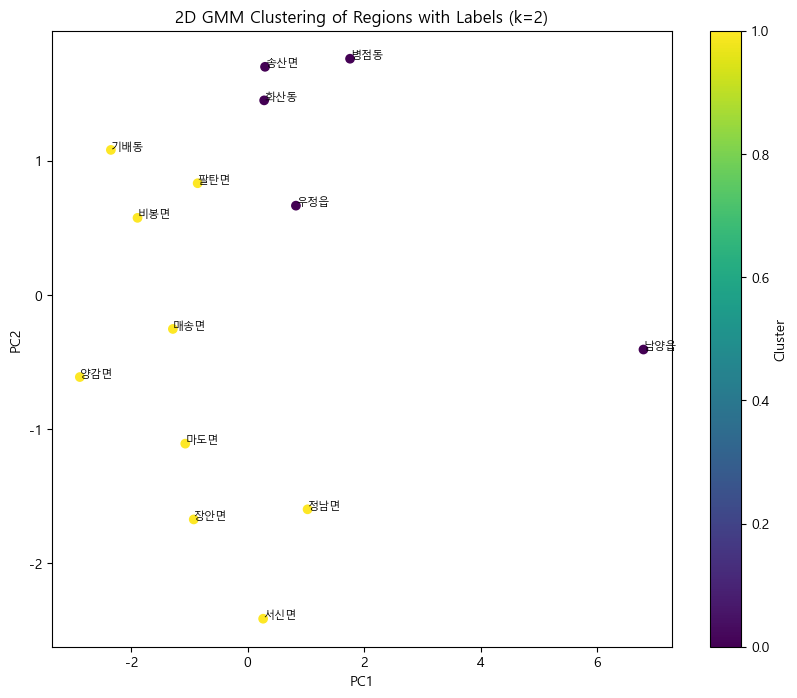

   Cluster                             Regions in Cluster
0        0                      [우정읍, 남양읍, 송산면, 병점동, 화산동]
1        1  [매송면, 비봉면, 마도면, 서신면, 팔탄면, 장안면, 양감면, 정남면, 기배동]


In [91]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 데이터 불러오기
file_path = 'feature_data_2.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# PCA 데이터프레임 (이전에 주성분 분석을 수행한 결과로 가정)
# pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2']) # 이 줄은 PCA 결과로 가정합니다.

# GMM 클러스터링 적용 (PC1과 PC2만 사용)
gmm = GaussianMixture(n_components=2, random_state=0)  # 클러스터 수 2로 설정
gmm_labels = gmm.fit_predict(pca_df[['PC1', 'PC2']])

# PCA 데이터프레임에 GMM 클러스터 레이블 추가
pca_df['GMM Cluster'] = gmm_labels

# 2D 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 각 군집별로 색상 지정 (viridis 컬러맵 사용)
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], 
                c=pca_df['GMM Cluster'], cmap='viridis', marker='o')
for i, region in enumerate(feature_data['읍면동']):
    ax.text(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], region, fontsize=8)

# 축 라벨 및 제목 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('2D GMM Clustering of Regions with Labels (k=2)')

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')

# 그래프 표시
plt.show()

# 각 클러스터에 포함된 지역 목록 데이터프레임 생성
cluster_regions = pca_df[['GMM Cluster']].copy()
cluster_regions['Region'] = feature_data['읍면동']
clustered_regions_df = cluster_regions.groupby('GMM Cluster')['Region'].apply(list).reset_index()
clustered_regions_df.columns = ['Cluster', 'Regions in Cluster']

# 결과 출력
print(clustered_regions_df)


In [98]:
import pandas as pd

# 클러스터 1 지역 데이터 선택
cluster_1_data = feature_data[feature_data['Cluster'] == 1]

# 가중치 설정
weights = {
    '고령화지수': 0.4,
    '의료기관': 0.3,
    '버스정류소': 0.2,
    '노인교실': 0.1,
    '공원': 0.1
}

# 점수 계산
for criterion, weight in weights.items():
    cluster_1_data[f'{criterion} 점수'] = cluster_1_data[criterion] * weight

# 총 점수 계산
cluster_1_data['총 점수'] = cluster_1_data[[f'{criterion} 점수' for criterion in weights.keys()]].sum(axis=1)

# 상위 3개 지역 추출
top_locations = cluster_1_data[['읍면동', '총 점수']].sort_values(by='총 점수', ascending=False).head(3)

# 결과 출력
print("최적의 입지 상위 3개 지역:")
print(top_locations)
print("")
print(" 1위: 서신면 -> 서신면은 높은 고령화지수를 가진 지역으로, 노인 인구가 상대적으로 많아 노인복지센터의 필요성이 크다. 또한 의료기관과 버스정류소의 접근성이 좋을 가능성이 높음.")
print(" 2위: 양감면 -> 양감면 역시 고령화가 높은 지역으로, 노인 관련 서비스를 제공하기에 유리한 조건을 갖추고 있다.")

최적의 입지 상위 3개 지역:
   읍면동        총 점수
6  서신면  434.695941
9  양감면  427.469841
7  팔탄면  340.460274

 1위: 서신면 -> 서신면은 높은 고령화지수를 가진 지역으로, 노인 인구가 상대적으로 많아 노인복지센터의 필요성이 크다. 또한 의료기관과 버스정류소의 접근성이 좋을 가능성이 높음.
 2위: 양감면 -> 양감면 역시 고령화가 높은 지역으로, 노인 관련 서비스를 제공하기에 유리한 조건을 갖추고 있다.


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_13512\3395011700.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data[f'{criterion} 점수'] = cluster_1_data[criterion] * weight
C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_13512\3395011700.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data[f'{criterion} 점수'] = cluster_1_data[criterion] * weight
C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_13512\3395011700.py:17: SettingWithCopyWarning: 
A value is trying to be set 

# 1차 클러스터링 -> 고령화지수 & 65세 이상 인구수 변수를 k-medoids를 통해 우선순위 18개 지역 뽑음

Cluster 1의 고령화지수와 65세 이상 인구수가 높은 지역:
     읍면동       고령화지수  65세 이상
0    봉담읍   75.071268   12377
2    향남읍   69.773338    9081
3    남양읍  104.170409    8118
13   새솔동   23.699792    1481
14   진안동   66.795794    4828
15   병점동  175.410270    6694
16   반월동   85.892814    7148
17   기배동  105.454545    2146
18   화산동  143.968096    4332
19  동탄1동   37.975978    2972
20  동탄2동   47.355289    2874
21  동탄3동   47.417625    3094
22  동탄4동   18.676758    2295
23  동탄5동   46.326506    3777
24  동탄6동   30.856472    2367
25  동탄7동   31.526279    3623
26  동탄8동   24.394385    2155
27  동탄9동   24.389518    2457


C:\Users\sungjae choi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


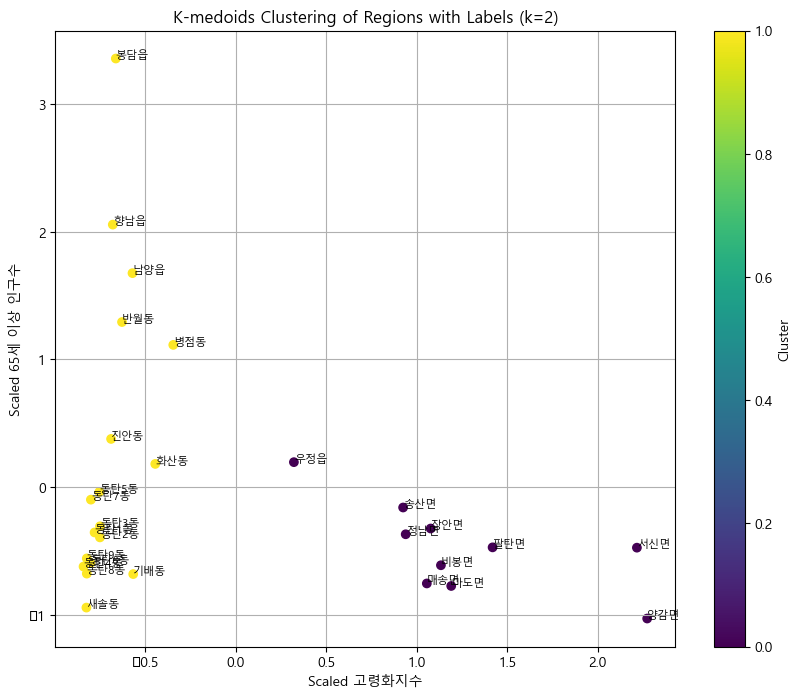

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
file_path = 'feature_data.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# 고령화지수와 65세 이상 인구수를 기준으로 클러스터링할 데이터 선택
age_index = feature_data[['읍면동', '고령화지수', '65세 이상']]

# 결측치 확인
age_index = age_index.dropna()  # 결측치 제거

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(age_index[['고령화지수', '65세 이상']])

# K-medoids 클러스터링 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(scaled_features)

# 클러스터 결과를 feature_data에 추가
feature_data['K-medoids Cluster'] = kmedoids_labels

# Cluster 1 (고령화지수와 65세 이상 인구수가 높은 지역) 데이터 선택
cluster_1_data = feature_data[feature_data['K-medoids Cluster'] == 1]
print("Cluster 1의 고령화지수와 65세 이상 인구수가 높은 지역:")
print(cluster_1_data[['읍면동', '고령화지수', '65세 이상']])

# K-medoids 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmedoids_labels, cmap='viridis', marker='o')

# 각 데이터 포인트 위에 지역명 표시
for i, region in enumerate(age_index['읍면동']):
    plt.text(scaled_features[i, 0], scaled_features[i, 1], region, fontsize=8)

# 축 라벨 및 제목 설정
plt.xlabel('Scaled 고령화지수')
plt.ylabel('Scaled 65세 이상 인구수')
plt.title('K-medoids Clustering of Regions with Labels (k=2)')

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')
plt.grid()
plt.show()


# Data Scailing & 다중공선성 확인

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# 데이터 불러오기
feature_data = pd.read_excel('feature_final.xlsx')

# 수치형 데이터만 선택
numeric_features = feature_data.select_dtypes(include=['float64', 'int64'])

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]

# 결과 출력
print("다중공선성 확인 (VIF):")
print(vif_data)

다중공선성 확인 (VIF):
    Feature        VIF
0      의료기관  13.549842
1       가로등  13.123785
2     버스정류소  14.059480
3      노인교실   5.486169
4        공원   5.407232
5   종합사회복지관   2.823010
6       보안등   4.971038
7     고령화지수   5.099987
8    개방공공시설  12.385463
9    65세 이상   4.682103
10     CCTV  26.416035


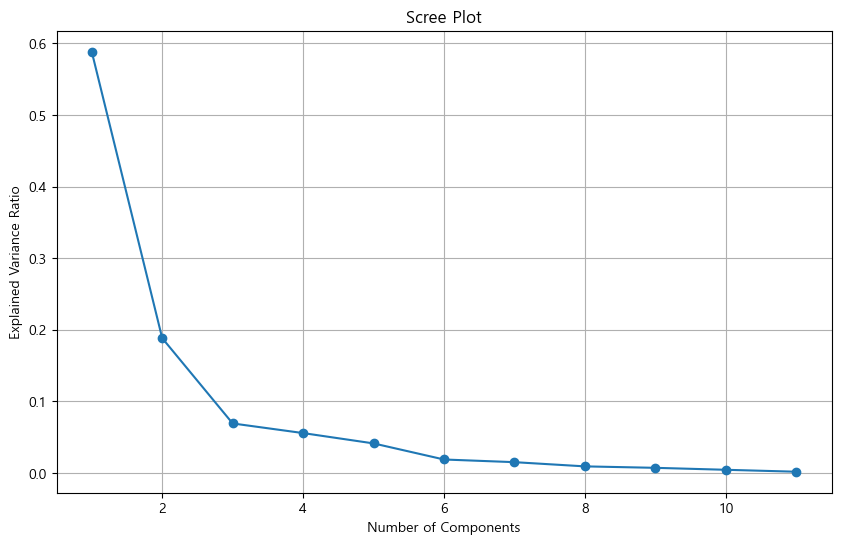

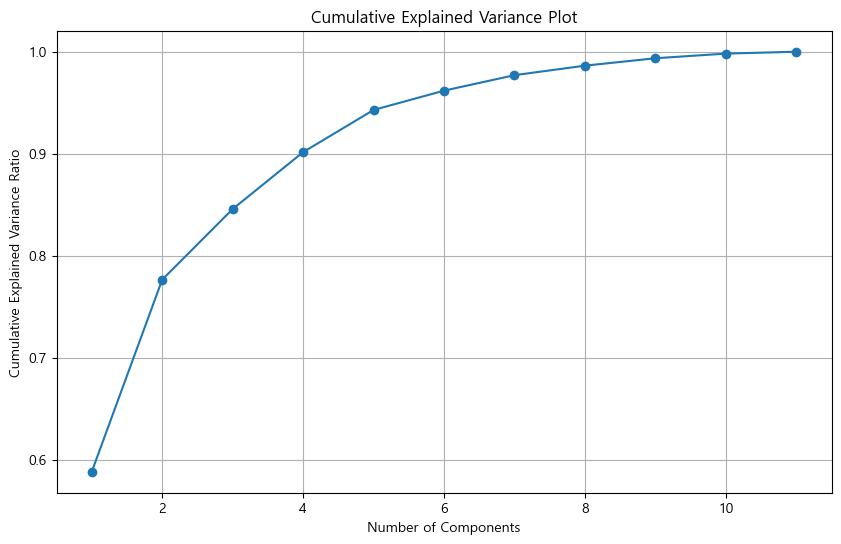

,Number of Components,Cumulative Explained Variance
0,1,0.588192
1,2,0.776505
2,3,0.845751
3,4,0.901537
4,5,0.942905
5,6,0.961819
6,7,0.977009
7,8,0.986320
8,9,0.993604
9,10,0.998152


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
feature_data = pd.read_excel('feature_final.xlsx')

# 수치형 데이터만 선택
numeric_features = feature_data.select_dtypes(include=['float64', 'int64'])

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# PCA 적용
pca = PCA()
pca.fit(scaled_features)

# Scree Plot으로 설명된 분산 비율 확인
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

# 누적 설명된 분산 비율 확인
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

# 누적 설명된 분산 비율 출력
cumulative_variance_df = pd.DataFrame({
    'Number of Components': range(1, len(cumulative_variance) + 1),
    'Cumulative Explained Variance': cumulative_variance
})

cumulative_variance_df

# 주성분의 계수 확인

주성분 계수 (loadings):
              PC1       PC2       PC3
의료기관     0.370865 -0.001374 -0.163485
가로등      0.359272  0.146779 -0.303699
버스정류소    0.355984  0.231499 -0.153682
노인교실     0.283398  0.387173  0.275010
공원       0.335236 -0.282286  0.087111
종합사회복지관  0.184306 -0.454920  0.663439
보안등      0.285391 -0.344788  0.101884
고령화지수    0.047504  0.607736  0.553303
개방공공시설   0.378196 -0.000662 -0.024921
CCTV     0.391479  0.009961 -0.130023


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7928\3883809024.py:48: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\sungjae choi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


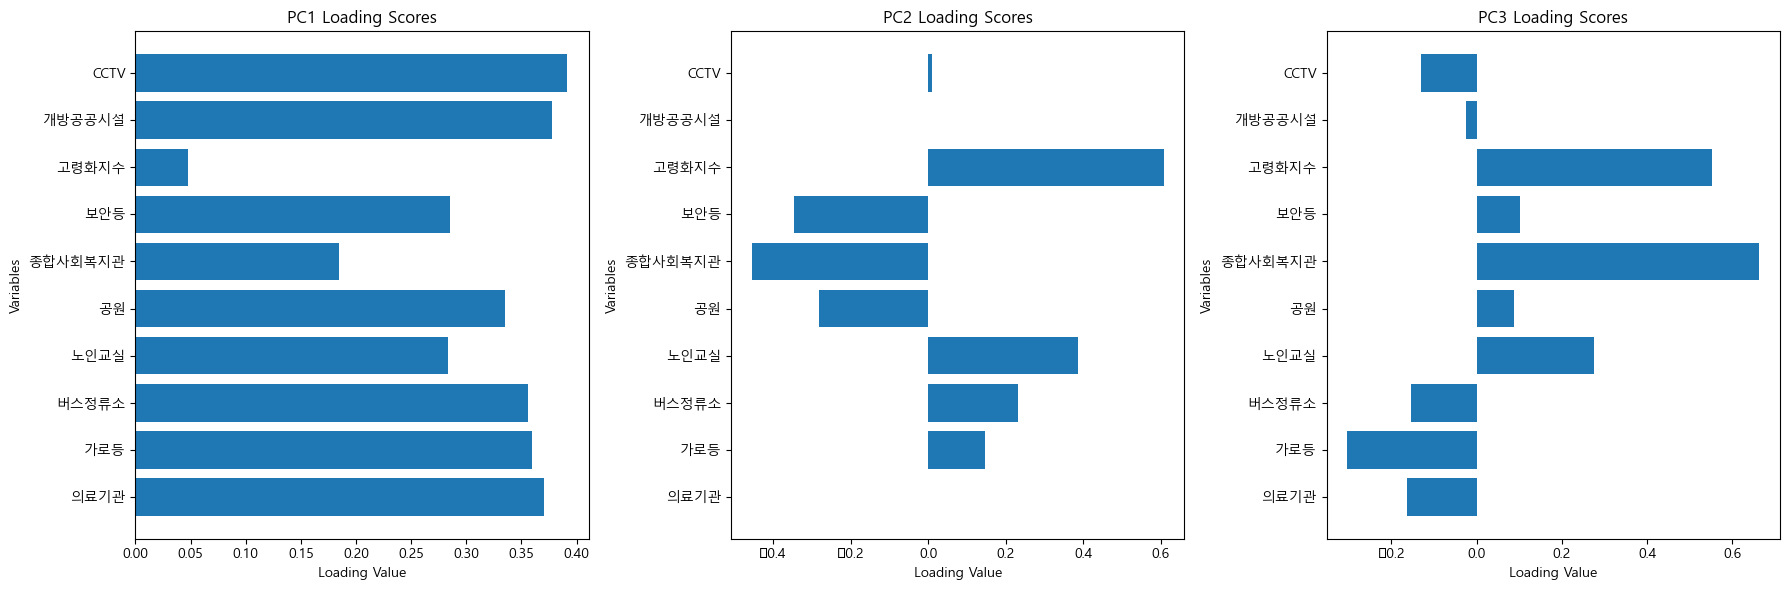

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
feature_data = pd.read_excel('feature_final.xlsx')  # 수정된 파일 경로

# 고령화지수가 높은 지역 데이터 선택
cluster_1_data = feature_data  # 이미 18개 지역만 있는 데이터

# 분석에 사용할 변수 선택 (고령화지수 외의 다른 변수들 포함)
important_features = ['의료기관', '가로등',  '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']

# 분석할 데이터 선택
X = cluster_1_data[important_features]

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# PCA 적용 (3개의 주성분으로 축소)
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])

# 주성분 계수 (loadings) 구하기
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)
print("주성분 계수 (loadings):")
print(loadings)

# 시각화 - 막대그래프로 각 변수의 주성분 기여도 확인
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 3개의 서브플롯 생성

for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    ax[i].barh(loadings.index, loadings[pc])
    ax[i].set_title(f"{pc} Loading Scores")
    ax[i].set_xlabel('Loading Value')
    ax[i].set_ylabel('Variables')

plt.tight_layout()
plt.show()



In [23]:
print("주성분 계수는 각 원래 변수들이 각 주성분에 얼마나 기여하는지를 나타냄. 계수의 절대값이 클수록 해당 변수의 영향력이 크며, 부호는 변수의 영향 방향을 나타낸다.")
print("PC1은 의료기관, 가로등, 버스정류소와 같은 인프라 변수들이 주요 기여를 하며, 이들 수치가 높을수록 노인 복지 서비스의 가용성이 높아짐을 나타낸다.")
print("PC2는 노인교실과 관련된 변수들이 긍정적인 기여를 하며, 이는 노인 교육 및 사회적 활동에 대한 접근성이 증가함을 의미함.")
print("PC3는 종합사회복지관과 노인교실의 수가 주요 기여를 하여, 복지 서비스와 교육 자원의 가용성이 높아짐을 나타냄.")

주성분 계수는 각 원래 변수들이 각 주성분에 얼마나 기여하는지를 나타냄. 계수의 절대값이 클수록 해당 변수의 영향력이 크며, 부호는 변수의 영향 방향을 나타낸다.
PC1은 의료기관, 가로등, 버스정류소와 같은 인프라 변수들이 주요 기여를 하며, 이들 수치가 높을수록 노인 복지 서비스의 가용성이 높아짐을 나타낸다.
PC2는 노인교실과 관련된 변수들이 긍정적인 기여를 하며, 이는 노인 교육 및 사회적 활동에 대한 접근성이 증가함을 의미함.
PC3는 종합사회복지관과 노인교실의 수가 주요 기여를 하여, 복지 서비스와 교육 자원의 가용성이 높아짐을 나타냄.


# K-Means Clustering

### 최적의 k값을 구하기 위해 실루엣 계수 확인

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

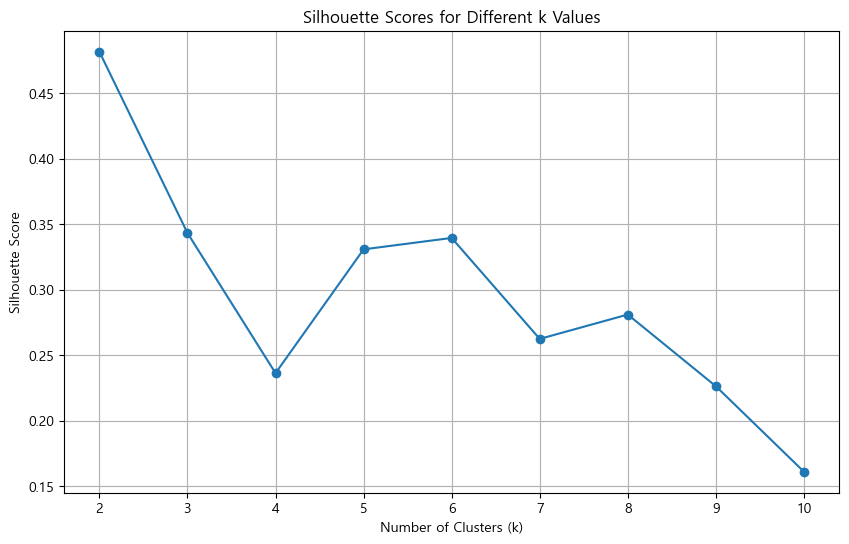

최적의 k값: 2, 실루엣 점수: 0.48155297925971396


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
file_path = 'feature_final.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# PCA 적용 (2개의 주성분으로 축소)
important_features = ['의료기관', '가로등', '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']
X = feature_data[important_features]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# 최적의 k값 찾기 위해 실루엣 점수 계산
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(pca_features)
    silhouette_avg = silhouette_score(pca_features, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.grid()
plt.show()

# 가장 높은 실루엣 점수와 해당 k값 출력
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"최적의 k값: {best_k}, 실루엣 점수: {max(silhouette_scores)}")


### K의 값을 1부터 10까지 변화시켰을 때 평균 실루엣 지표를 계산하여 K=2인 결론을 얻고, 위 결과에 따라 2개의 클러스터를 생성하였고 각 클러스터를 Cluster0, Cluster1으로 명명하였다.

C:\Users\sungjae choi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungjae choi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


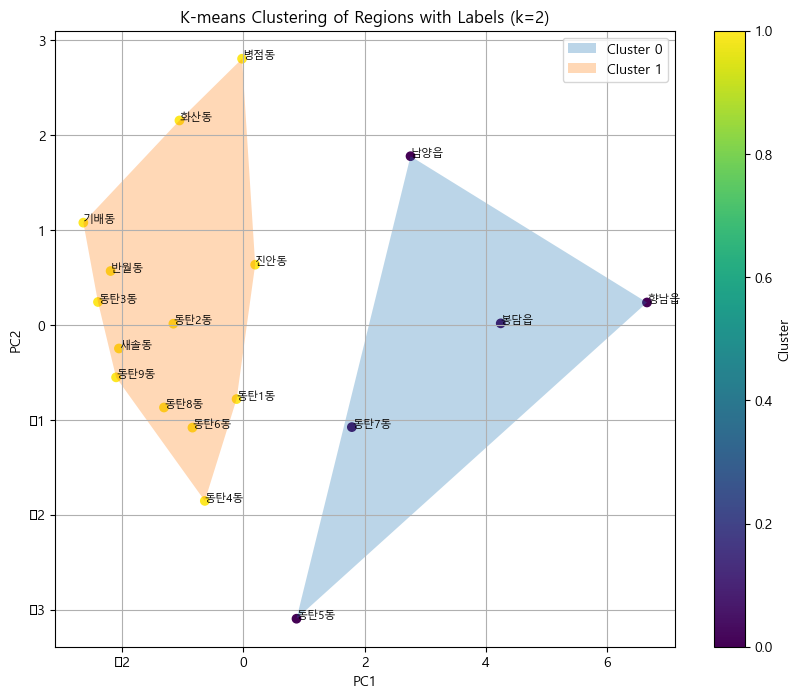

클러스터에 포함된 지역 목록:
     읍면동  Cluster
0    봉담읍        0
1    향남읍        0
2    남양읍        0
15  동탄7동        0
13  동탄5동        0
14  동탄6동        1
12  동탄4동        1
11  동탄3동        1
10  동탄2동        1
8    화산동        1
16  동탄8동        1
7    기배동        1
6    반월동        1
5    병점동        1
4    진안동        1
3    새솔동        1
9   동탄1동        1
17  동탄9동        1


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm
from scipy.spatial import ConvexHull
import numpy as np

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
file_path = 'feature_final.xlsx'  # 수정된 파일 경로
feature_data = pd.read_excel(file_path)

# PCA 적용 (2개의 주성분으로 축소)
important_features = ['의료기관', '가로등', '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']
X = feature_data[important_features]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# K-means 클러스터링 수행 (k=2 설정)
kmeans = KMeans(n_clusters=2, random_state=0)
feature_data['Cluster'] = kmeans.fit_predict(pca_features)

# 2D 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=feature_data['Cluster'], cmap='viridis', marker='o')

# 각 데이터 포인트 위에 지역명 표시
for i, region in enumerate(feature_data['읍면동']):
    plt.text(pca_features[i, 0], pca_features[i, 1], region, fontsize=8)

# 각 클러스터에 대해 다각형 그리기
for cluster in np.unique(feature_data['Cluster']):
    cluster_data = pca_features[feature_data['Cluster'] == cluster]
    if len(cluster_data) > 2:  # ConvexHull을 그리기 위해 최소 3점 필요
        hull = ConvexHull(cluster_data)
        plt.fill(cluster_data[hull.vertices, 0], 
                 cluster_data[hull.vertices, 1], 
                 alpha=0.3, label=f'Cluster {cluster}')

# 축 라벨 및 제목 설정
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering of Regions with Labels (k=2)')

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.grid()
plt.show()

# 클러스터에 포함된 지역 목록 데이터프레임 생성
clustered_regions_df = feature_data[['읍면동', 'Cluster']].sort_values('Cluster')
print("클러스터에 포함된 지역 목록:")
print(clustered_regions_df)


In [36]:
print("데이터 불균형으로 인해 k-means 클러스터링 결과의 해석이 어려울 수 있으며, 하나의 클러스터에 너무 많은 지역이 집중되어 있어 이들 간의 유사성이 과도하게 강조될 수 있으므로 K-means 기각.")

데이터 불균형으로 인해 k-means 클러스터링 결과의 해석이 어려울 수 있으며, 하나의 클러스터에 너무 많은 지역이 집중되어 있어 이들 간의 유사성이 과도하게 강조될 수 있으므로 K-means 기각.


# K-Medoids

### 최적의 k값을 구하기 위해 실루엣 계수 확인

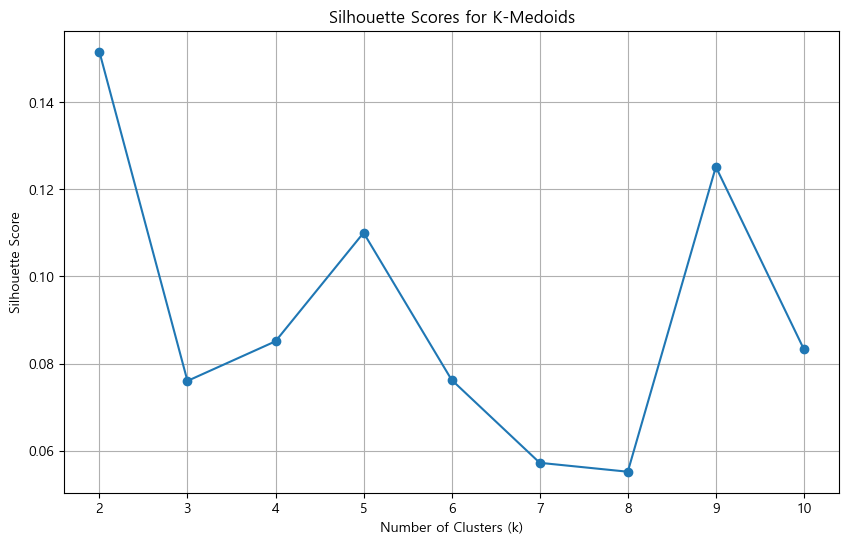

최적의 k값: 2, 실루엣 점수: 0.15151771409277645


In [38]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# k 값을 설정합니다.
k_values = range(2, 11)  # k=2부터 k=10까지
silhouette_scores = []

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids_labels = kmedoids.fit_predict(scaled_features)  # scaled_features는 PCA 결과를 스케일링한 데이터
    silhouette_avg = silhouette_score(scaled_features, kmedoids_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Medoids')
plt.grid()
plt.xticks(k_values)
plt.show()

# 가장 높은 실루엣 점수와 해당 k값 출력
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"최적의 k값: {best_k}, 실루엣 점수: {max(silhouette_scores)}")



C:\Users\sungjae choi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


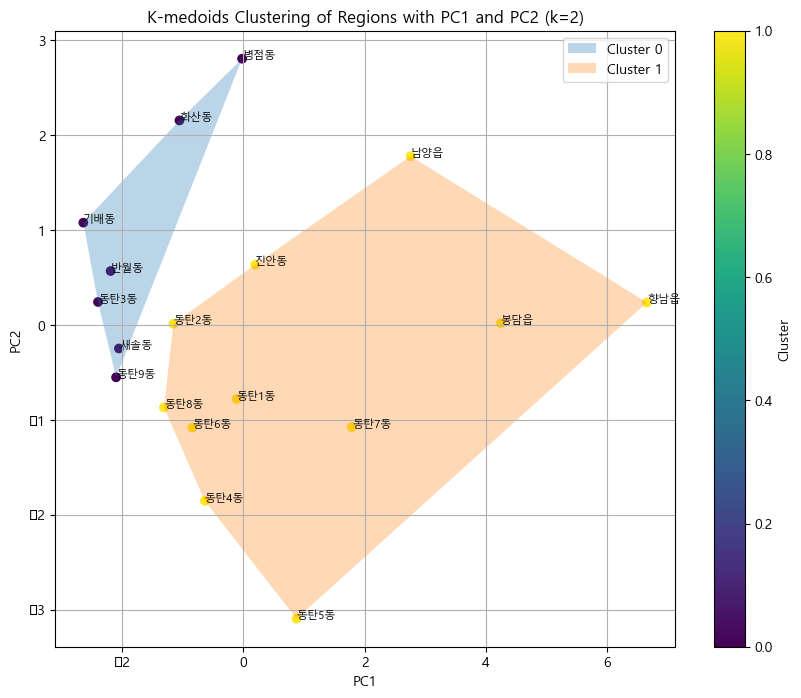

Cluster 1의 고령화지수와 65세 이상 인구수가 높은 지역:
     읍면동       고령화지수  65세 이상
0    봉담읍   75.071268   12377
1    향남읍   69.773338    9081
2    남양읍  104.170409    8118
4    진안동   66.795794    4828
9   동탄1동   37.975978    2972
10  동탄2동   47.355289    2874
12  동탄4동   18.676758    2295
13  동탄5동   46.326506    3777
14  동탄6동   30.856472    2367
15  동탄7동   31.526279    3623
16  동탄8동   24.394385    2155


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm
from scipy.spatial import ConvexHull
import numpy as np

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
feature_data = pd.read_excel('feature_final.xlsx')  # 수정된 파일 경로

# PCA 데이터프레임 (이전에 주성분 분석을 수행한 결과로 가정)
important_features = ['의료기관', '가로등', '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']
X = feature_data[important_features]

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# K-medoids 클러스터링 (k=2 설정)
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(scaled_features)

# 클러스터 결과를 feature_data에 추가
feature_data['K-medoids Cluster'] = kmedoids_labels

# K-medoids 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmedoids_labels, cmap='viridis', marker='o')

# 각 데이터 포인트 위에 지역명 표시
for i, region in enumerate(feature_data['읍면동']):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], region, fontsize=8)

# 각 클러스터에 대해 다각형 그리기
for cluster in np.unique(kmedoids_labels):
    cluster_data = pca_df[kmedoids_labels == cluster]
    if len(cluster_data) > 2:  # ConvexHull을 그리기 위해 최소 3점 필요
        hull = ConvexHull(cluster_data)
        plt.fill(cluster_data.iloc[hull.vertices, 0], 
                 cluster_data.iloc[hull.vertices, 1], 
                 alpha=0.3, label=f'Cluster {cluster}')

# 축 라벨 및 제목 설정
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-medoids Clustering of Regions with PC1 and PC2 (k=2)')

# 컬러바 추가 (클러스터 레이블)
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.grid()
plt.show()

# Cluster 1의 고령화지수와 65세 이상 인구수가 높은 지역 출력
cluster_1_data = feature_data[feature_data['K-medoids Cluster'] == 1]
print("Cluster 1의 고령화지수와 65세 이상 인구수가 높은 지역:")
print(cluster_1_data[['읍면동', '고령화지수', '65세 이상']])


# Hierarchical Clustering

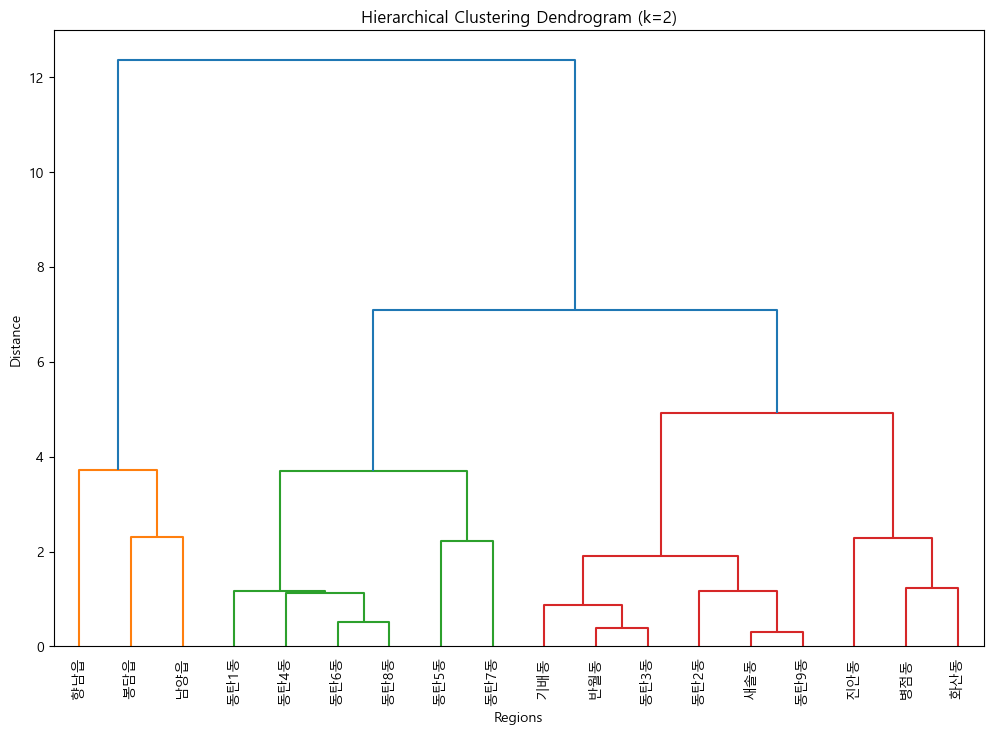

클러스터에 포함된 지역 목록:
     읍면동  Cluster
0    봉담읍        1
1    향남읍        1
2    남양읍        1
15  동탄7동        2
14  동탄6동        2
13  동탄5동        2
12  동탄4동        2
11  동탄3동        2
10  동탄2동        2
8    화산동        2
16  동탄8동        2
7    기배동        2
6    반월동        2
5    병점동        2
4    진안동        2
3    새솔동        2
9   동탄1동        2
17  동탄9동        2


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name

# 데이터 불러오기
feature_data = pd.read_excel('feature_final.xlsx')

# 분석에 사용할 변수 선택
important_features = ['의료기관', '가로등', '버스정류소', '노인교실', 
                      '공원', '종합사회복지관', '보안등', '고령화지수', '개방공공시설', 'CCTV']

# 분석할 데이터 선택
X = feature_data[important_features]

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# 계층적 군집 분석 수행 (연결 방법은 'ward' 사용)
linkage_matrix = linkage(pca_df, method='ward')

# k=2로 잘라서 클러스터링 레이블 생성
cluster_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')
feature_data['Cluster'] = cluster_labels  # 각 지역의 군집 레이블 확인을 위해 추가

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=feature_data['읍면동'].values, leaf_rotation=90, leaf_font_size=10, color_threshold=linkage_matrix[-2, 2])
plt.title("Hierarchical Clustering Dendrogram (k=2)")
plt.xlabel("Regions")
plt.ylabel("Distance")
plt.show()

# 결과 데이터프레임 출력
clustered_regions_df = feature_data[['읍면동', 'Cluster']].sort_values('Cluster')
print("클러스터에 포함된 지역 목록:")
print(clustered_regions_df)



In [43]:
print("클러스터 1에는 3개 지역만 포함되어 있는 반면, 클러스터 2에는 12개 지역이 포함되어 데이터 불균형이 심각함. 이러한 불균형은 클러스터의 대표성을 저하시킬 수 있으며, 결과의 해석과 활용에 혼란을 초래할 수 있으므로 기각.")

클러스터 1에는 3개 지역만 포함되어 있는 반면, 클러스터 2에는 12개 지역이 포함되어 데이터 불균형이 심각함. 이러한 불균형은 클러스터의 대표성을 저하시킬 수 있으며, 결과의 해석과 활용에 혼란을 초래할 수 있으므로 기각.


In [57]:
import pandas as pd

# Assume feature_data contains your clustering results and relevant features
# Example weights for relevant features
weights = {
    '고령화지수': 0.4,
    '의료기관': 0.2,
    '버스정류소': 0.2,
    '공원': 0.1,
    '노인교실': 0.1
}

# Create a new DataFrame for Cluster 1 data
cluster_1_data = feature_data[feature_data['K-medoids Cluster'] == 1]

# Calculate score based on weights
for feature, weight in weights.items():
    cluster_1_data[f'{feature} Score'] = cluster_1_data[feature] * weight

# Calculate total score
cluster_1_data['Total Score'] = cluster_1_data[[f'{feature} Score' for feature in weights.keys()]].sum(axis=1)

# Sort by total score to find top locations
top_locations = cluster_1_data[['읍면동', 'Total Score', '고령화지수', '65세 이상']].sort_values(by='Total Score', ascending=False)

# Display top locations
print("최적의 위치 상위 지역:")
print(top_locations)


최적의 위치 상위 지역:
    읍면동  Total Score        고령화지수  65세 이상
8   서신면   432.695941   985.239852    2670
11  양감면   426.469841  1003.174603    1264
9   팔탄면   337.760274   733.150685    2676
6   마도면   288.259862   660.899654    1910
10  장안면   286.300000   625.000000    3050
5   비봉면   277.174515   642.936288    2321
7   송산면   267.248752   576.871880    3467
12  정남면   266.354455   581.386139    2936
4   매송면   262.618612   618.296530    1960
1   우정읍   210.647392   386.118479    4367
2   향남읍   145.709335    69.773338    9081
3   남양읍   131.368164   104.170409    8118
0   봉담읍   129.028507    75.071268   12377
15  병점동   125.164108   175.410270    6694
18  화산동    70.587238   143.968096    4332


C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7928\2088714316.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data[f'{feature} Score'] = cluster_1_data[feature] * weight
C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7928\2088714316.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data[f'{feature} Score'] = cluster_1_data[feature] * weight
C:\Users\sungjae choi\AppData\Local\Temp\ipykernel_7928\2088714316.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 